**Goal**:

The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

**Dataset**:

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

Train_Data
Test_Data

Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

**Data Dictionary:**

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

Submission File Format: You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

ID
Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

**Evaluation Criteria:**

Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.

In other words, the best possible accuracy is 100% (or 1) and the worst possible accuracy 0%.

In [3]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

In [5]:
# Importing the required libraries and overview of the dataset

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Path for travel data test
travel_data_test = "/content/drive/MyDrive/Hackathon/Traveldata_test_(2).csv"

In [8]:
# Path for travel data train
travel_data_train = "/content/drive/MyDrive/Hackathon/Traveldata_train_(2).csv"

In [9]:
# Path for survey data test
survey_data_test = "/content/drive/MyDrive/Hackathon/Surveydata_test_(2).csv"

In [10]:
# Path for survey data train
survey_data_train = "/content/drive/MyDrive/Hackathon/Surveydata_train_(2).csv"

In [11]:
# Read file into dataframe
df_travel_test = pd.read_csv(travel_data_test)

In [12]:
# Read file into dataframe
df_travel_train = pd.read_csv(travel_data_train)

In [13]:
# Read file into dataframe
df_survey_test = pd.read_csv(survey_data_test)

In [14]:
# Read file into dataframe
df_survey_train = pd.read_csv(survey_data_train)

In [15]:
# Display first five records of dataframe
df_travel_train.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0

In [16]:
# Display last five records of dataframe
df_travel_train.tail()

ID Gender   Customer_Type   Age      Type_Travel Travel_Class  \
94374  98894375   Male  Loyal Customer  32.0  Business Travel     Business   
94375  98894376   Male  Loyal Customer  44.0  Business Travel     Business   
94376  98894377   Male             NaN  63.0  Business Travel     Business   
94377  98894378   Male  Loyal Customer  16.0  Personal Travel          Eco   
94378  98894379   Male  Loyal Customer  54.0              NaN          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
94374             1357                     83.0                  125.0  
94375              592                      5.0                   11.0  
94376             2794                      0.0                    0.0  
94377             2744                      0.0                    0.0  
94378             2107                     28.0                   28.0

In [17]:
# Get shape of dataframe
df_travel_train.shape

(94379, 9)

In [18]:
# Info about dataframe
df_travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


<Axes: >

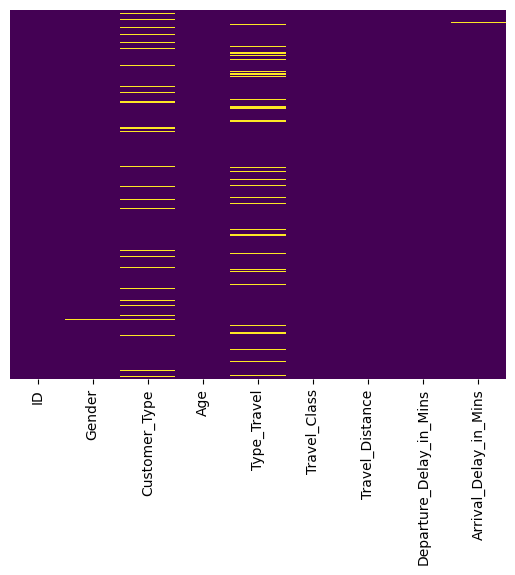

In [19]:
# Visualize if there are any missing values in the data
sns.heatmap(df_travel_train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

The above plot shows there some null values in the gender, customer type, and type travle categories

In [20]:
# Calculate missing ratio for each column
missing_ratio = round(df_travel_train.isnull().sum() / len(df_travel_train) * 100,2)

print("Missing Ratio by Column:")
print(missing_ratio)

Missing Ratio by Column:
ID                         0.00
Gender                     0.08
Customer_Type              9.48
Age                        0.03
Type_Travel                9.78
Travel_Class               0.00
Travel_Distance            0.00
Departure_Delay_in_Mins    0.06
Arrival_Delay_in_Mins      0.38
dtype: float64


I see that ratio of missing data is less than 10%, which means that imputation is suitable

In [21]:
# Columns to impute with mode
columns_to_impute = ['Gender','Age', 'Type_Travel', 'Customer_Type']

# Impute missing values with the mode for selected columns
for column in columns_to_impute:
    mode_value = df_travel_train[column].mode().iloc[0]
    df_travel_train[column].fillna(mode_value, inplace=True)

# Impute missing values with median for selected columns. Median is used because data for arrival and departure delay time is skewed
median_imputed_arrival_time = df_travel_train['Arrival_Delay_in_Mins'].fillna(df_travel_train['Arrival_Delay_in_Mins'].median())
median_imputed_dept_time = df_travel_train['Departure_Delay_in_Mins'].fillna(df_travel_train['Departure_Delay_in_Mins'].median())


# Replace the 'arrival time' and 'departure time' column with the median-imputed values
df_travel_train['Arrival_Delay_in_Mins'] = median_imputed_arrival_time
df_travel_train['Departure_Delay_in_Mins'] = median_imputed_dept_time


<Axes: >

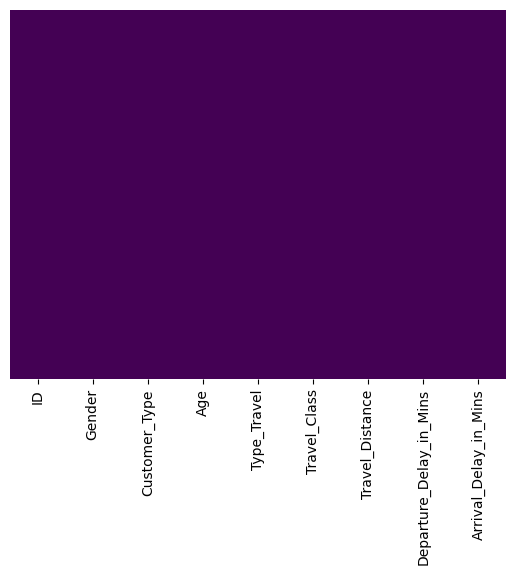

In [22]:
# Visualize if there are any missing values in the data
sns.heatmap(df_travel_train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [23]:
# Calculate missing ratio for each column
missing_ratio_test = round(df_travel_test.isnull().sum() / len(df_travel_test) * 100,2)

print("Missing Ratio by Column:")
print(missing_ratio_test)

Missing Ratio by Column:
ID                         0.00
Gender                     0.08
Customer_Type              9.50
Age                        0.03
Type_Travel                9.68
Travel_Class               0.00
Travel_Distance            0.00
Departure_Delay_in_Mins    0.08
Arrival_Delay_in_Mins      0.35
dtype: float64


I see that missing values in the test data set are less than 10%, which means that imputation is also suitable in this case

In [24]:
# Columns to impute with mode
columns_to_impute = ['Gender','Age', 'Type_Travel', 'Customer_Type']

# Impute missing values with the mode for selected columns
for column in columns_to_impute:
    mode_value = df_travel_test[column].mode().iloc[0]
    df_travel_test[column].fillna(mode_value, inplace=True)

# Impute missing values with median for selected columns. Median is used because data for arrival delay time is skewed
median_imputed_arrival_time = df_travel_test['Arrival_Delay_in_Mins'].fillna(df_travel_test['Arrival_Delay_in_Mins'].median())

# Replace the 'arrival time' column with the median-imputed values
df_travel_test['Arrival_Delay_in_Mins'] = median_imputed_arrival_time


<Axes: >

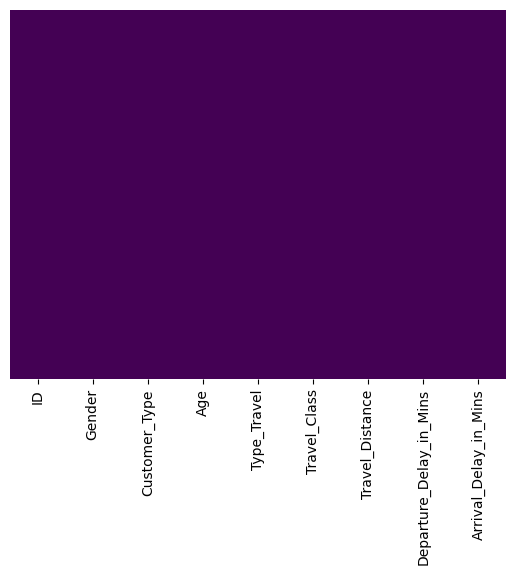

In [25]:
# Visualize if there are any missing values in the data
sns.heatmap(df_travel_test.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [26]:
df_travel_train.describe(include="all")

ID  Gender   Customer_Type           Age      Type_Travel  \
count   9.437900e+04   94379           94379  94379.000000            94379   
unique           NaN       2               2           NaN                2   
top              NaN  Female  Loyal Customer           NaN  Business Travel   
freq             NaN   47892           78774           NaN            67843   
mean    9.884719e+07     NaN             NaN     39.419500              NaN   
std     2.724501e+04     NaN             NaN     15.113991              NaN   
min     9.880000e+07     NaN             NaN      7.000000              NaN   
25%     9.882360e+07     NaN             NaN     27.000000              NaN   
50%     9.884719e+07     NaN             NaN     40.000000              NaN   
75%     9.887078e+07     NaN             NaN     51.000000              NaN   
max     9.889438e+07     NaN             NaN     85.000000              NaN   

       Travel_Class  Travel_Distance  Departure_Delay_in_Mins  \
count         94379     94379.000000             94379.000000   
unique            2              NaN                      NaN   
top             Eco              NaN                      NaN   
freq          49342              NaN                      NaN   
mean            NaN      1978.888185                14.638246   
std             NaN      1027.961019                38.128961   
min             NaN        50.000000                 0.000000   
25%             NaN      1359.000000                 0.000000   
50%             NaN      1923.000000                 0.000000   
75%             NaN      2538.000000                12.000000   
max             NaN      6951.000000              1592.000000   

        Arrival_Delay_in_Mins  
count            94379.000000  
unique                    NaN  
top                       NaN  
freq                      NaN  
mean                14.948463  
std                 38.377695  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                 13.000000  
max               1584.000000

Gender:
- There are 2 unique genders
- The most popular is Female

Customer Type:
- There are 2 types of customer
- The most popular is Loyal Customer

Age:
- The average age is 39 years old
- The lowest age is 7 years old
- The highest age is 85 years old
- The standard deviation is 15 years, which means that 68% of people fall into the range of 24 and 54 years

Type Travel:
- There are only two types of travel
- The most popular is business travel

Travel Class:
- There are only two types of travel class
- The most popular is Economic

Travel Distance:
- The average travel distance is 1987 miles
- The shortest travel distance is 50 miles
- The longest travel distance is 6868 miles
- The standard deviation is 1024 miles, which means that 68% of trips range between 963 miles and 3011 miles

Departure Delay in Minutes:
- The average delay is 14 minutes
- The shortest dealy is 0 minutes
- The longest delay is 978 minutes
- The std is 37 minutes, which means that 68% of trips had a delay that ranged between 0 to 51 minutes

Arrival Delay in Minutes:
- The average delay is 15 minutes
- The shortest delay is 0 minutes
- The longest delay is 970 minutes
- The std is 38 minutes, which means that 68% of trips had a delay that ranged between 0 and 53 minutes







In [27]:
# Function to count unwanted characters
def count_unwanted_chars(cell):
    unwanted_chars = ['$','#']
    if isinstance(cell, str):
        for char in unwanted_chars:
            if char in cell:
                return 1
    return 0

# Calculate the count of unwanted characters by column
unwanted_char_count_by_column = {}

for column in df_travel_train.columns:
    column_count = df_travel_train[column].apply(count_unwanted_chars).sum()
    unwanted_char_count_by_column[column] = column_count

# Print the count of unwanted characters by column
for column, count in unwanted_char_count_by_column.items():
    print(f"Column '{column}': {count} unwanted characters")

Column 'ID': 0 unwanted characters
Column 'Gender': 0 unwanted characters
Column 'Customer_Type': 0 unwanted characters
Column 'Age': 0 unwanted characters
Column 'Type_Travel': 0 unwanted characters
Column 'Travel_Class': 0 unwanted characters
Column 'Travel_Distance': 0 unwanted characters
Column 'Departure_Delay_in_Mins': 0 unwanted characters
Column 'Arrival_Delay_in_Mins': 0 unwanted characters


<Axes: xlabel='Age', ylabel='Density'>

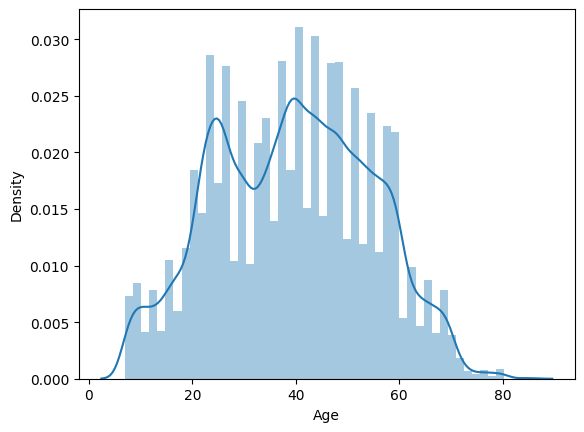

In [28]:
# Plot a distplot for delivery time, using a distplot
sns.distplot(df_travel_train['Age'])

In the above plot, I see that Ages are relatively normally distributed and there is a large number of passengers that have approximately 40 years old

<Axes: xlabel='Travel_Distance', ylabel='Density'>

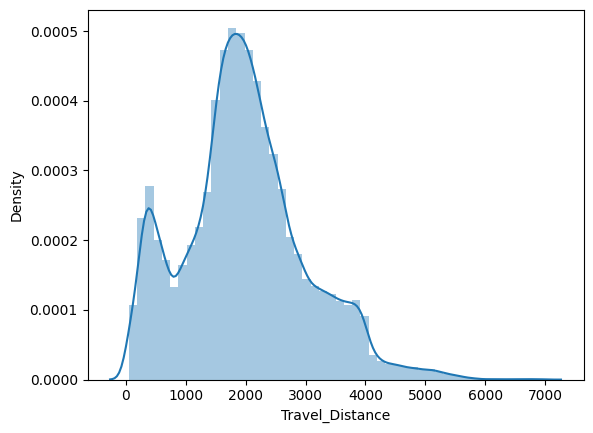

In [29]:
# Plot a distplot for delivery time, using a distplot
sns.distplot(df_travel_train['Travel_Distance'])

In the above plot I see travel distance is positively skewed and there is a large number of passangers that had a travel distance of approximately 1900 miles.

<Axes: xlabel='Departure_Delay_in_Mins', ylabel='Density'>

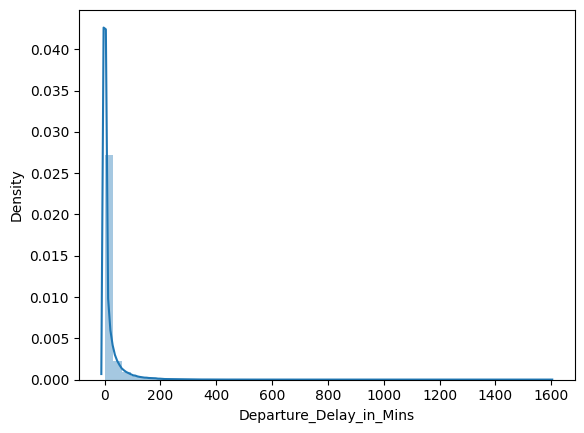

In [30]:
# Plot a distplot for delivery time, using a distplot
sns.distplot(df_travel_train['Departure_Delay_in_Mins'])

I see in the above plot that departure delay time is significantly positively skewed

<Axes: xlabel='Arrival_Delay_in_Mins', ylabel='Density'>

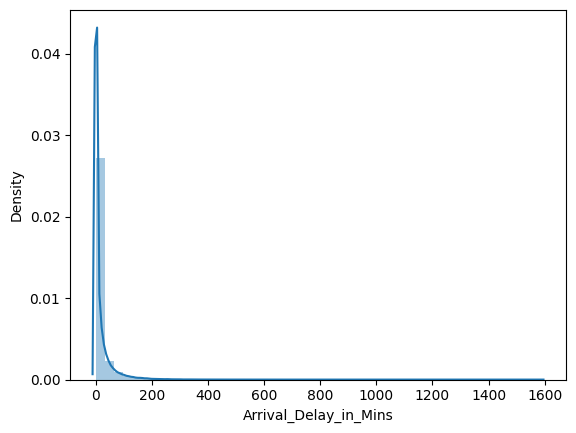

In [31]:
# Plot a distplot for delivery time, using a distplot
sns.distplot(df_travel_train['Arrival_Delay_in_Mins'])

I see in the above plot that arrival delay time is significantly positively skewed

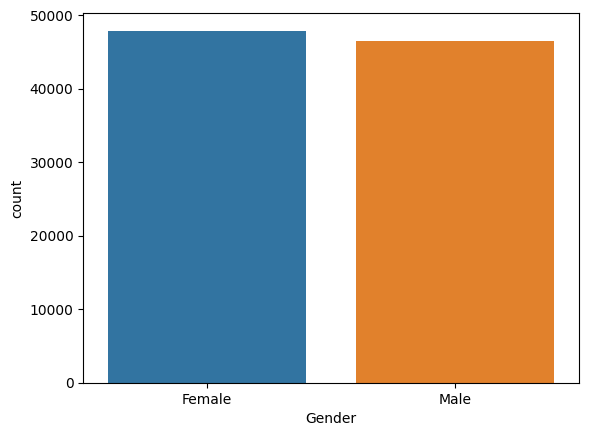

In [32]:
# plot a bar chart for rating
sns.countplot(data=df_travel_train,x='Gender')

# show plot
plt.show()

In the above plot I see that there is slightly more females than males

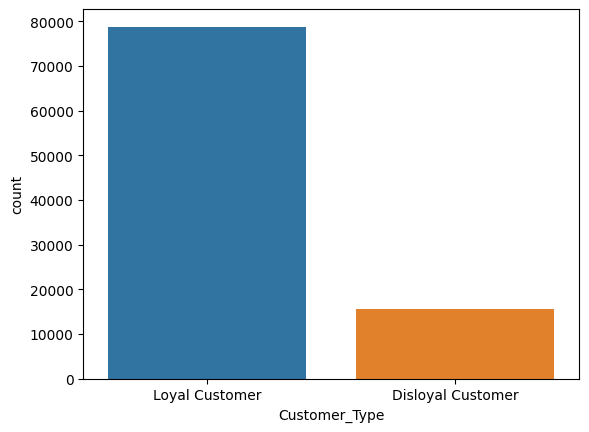

In [33]:
# plot a bar chart for rating
sns.countplot(data=df_travel_train,x='Customer_Type')

# show plot
plt.show()

In the above plot I see there is significantly more loyal customers than disloyal customers

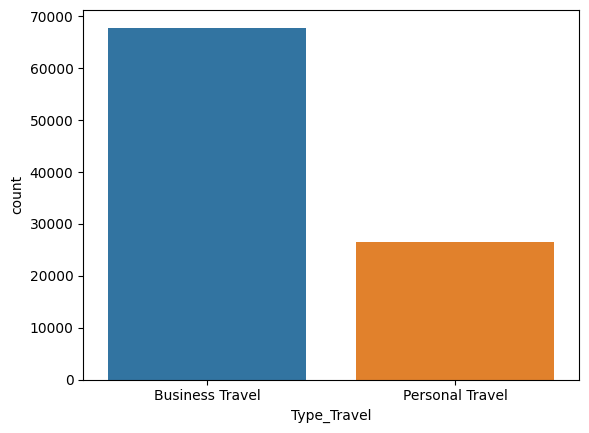

In [34]:
# plot a bar chart for rating
sns.countplot(data=df_travel_train,x='Type_Travel')

# show plot
plt.show()

In the above plot I see there is a greater number of people that are travel for business than for personal reasons

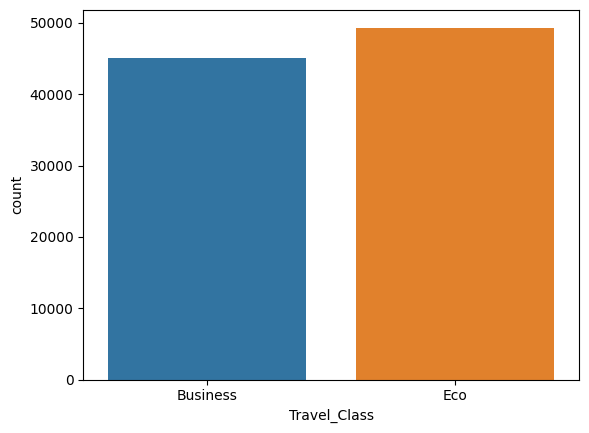

In [35]:
# plot a bar chart for rating
sns.countplot(data=df_travel_train,x='Travel_Class')

# show plot
plt.show()

In the above plot I see there is a slightly higher number of passengers choose economic class than business class

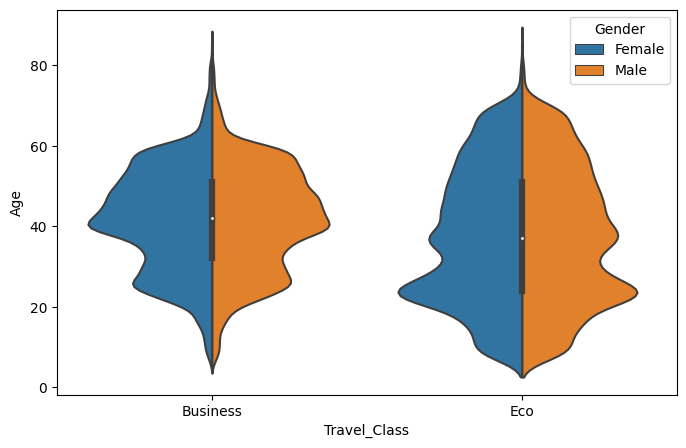

In [36]:
# set the figure size
plt.figure(figsize = (8,5))

# violin plot with addition of the variable 'sex'
# 'split = True' draws half plot for each of the category of 'sex'
sns.violinplot(y = 'Age', x = 'Travel_Class', data = df_travel_train, hue = 'Gender', split = True)

# display the plot
plt.show()

In the above plot I see passangers seem to relatively evenly distributed among females and males. I notice that young passengers approximately in their 20s tend to buy economic class while passangers approximately in their 40s tend to buy business class tickets.

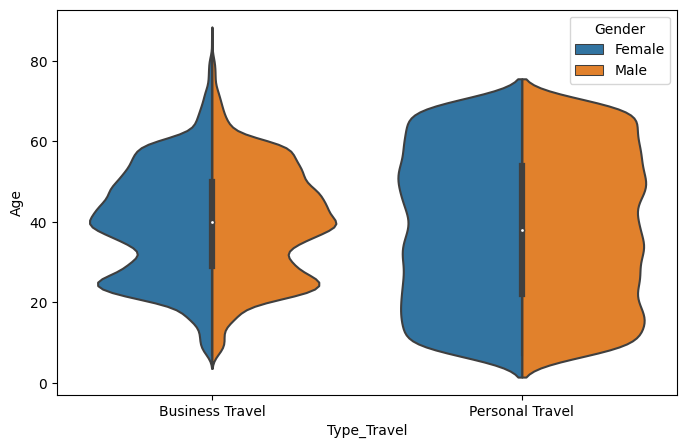

In [37]:
# set the figure size
plt.figure(figsize = (8,5))

# violin plot with addition of the variable 'sex'
# 'split = True' draws half plot for each of the category of 'sex'
sns.violinplot(y = 'Age', x = 'Type_Travel', data = df_travel_train, hue = 'Gender', split = True)

# display the plot
plt.show()

In the above plot I see that there is roughly an even distribution among females and males for business and personal type travel. I notice that people from all ages have personal type travel. People that travel for business tend to be in their 40s.

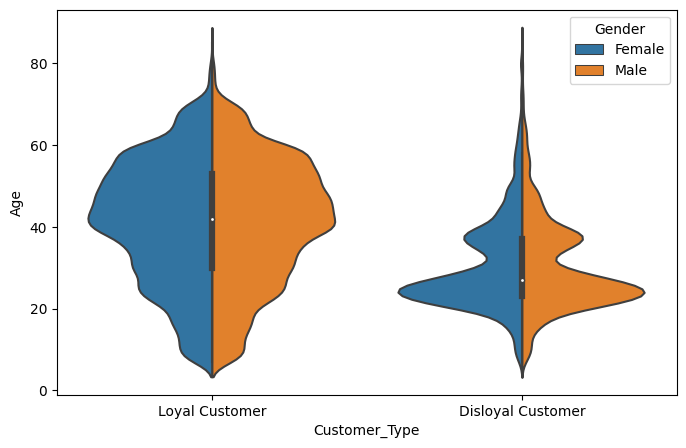

In [38]:
# set the figure size
plt.figure(figsize = (8,5))

# violin plot with addition of the variable 'sex'
# 'split = True' draws half plot for each of the category of 'sex'
sns.violinplot(y = 'Age', x = 'Customer_Type', data = df_travel_train, hue = 'Gender', split = True)

# display the plot
plt.show()

In the above plot I see that gender is evenly distributed among disloyal and loyal customers. I notice that disloyal customers tend to be in their 20s while loyal customers tend to be in their 40s and 50s.

<Figure size 800x800 with 0 Axes>

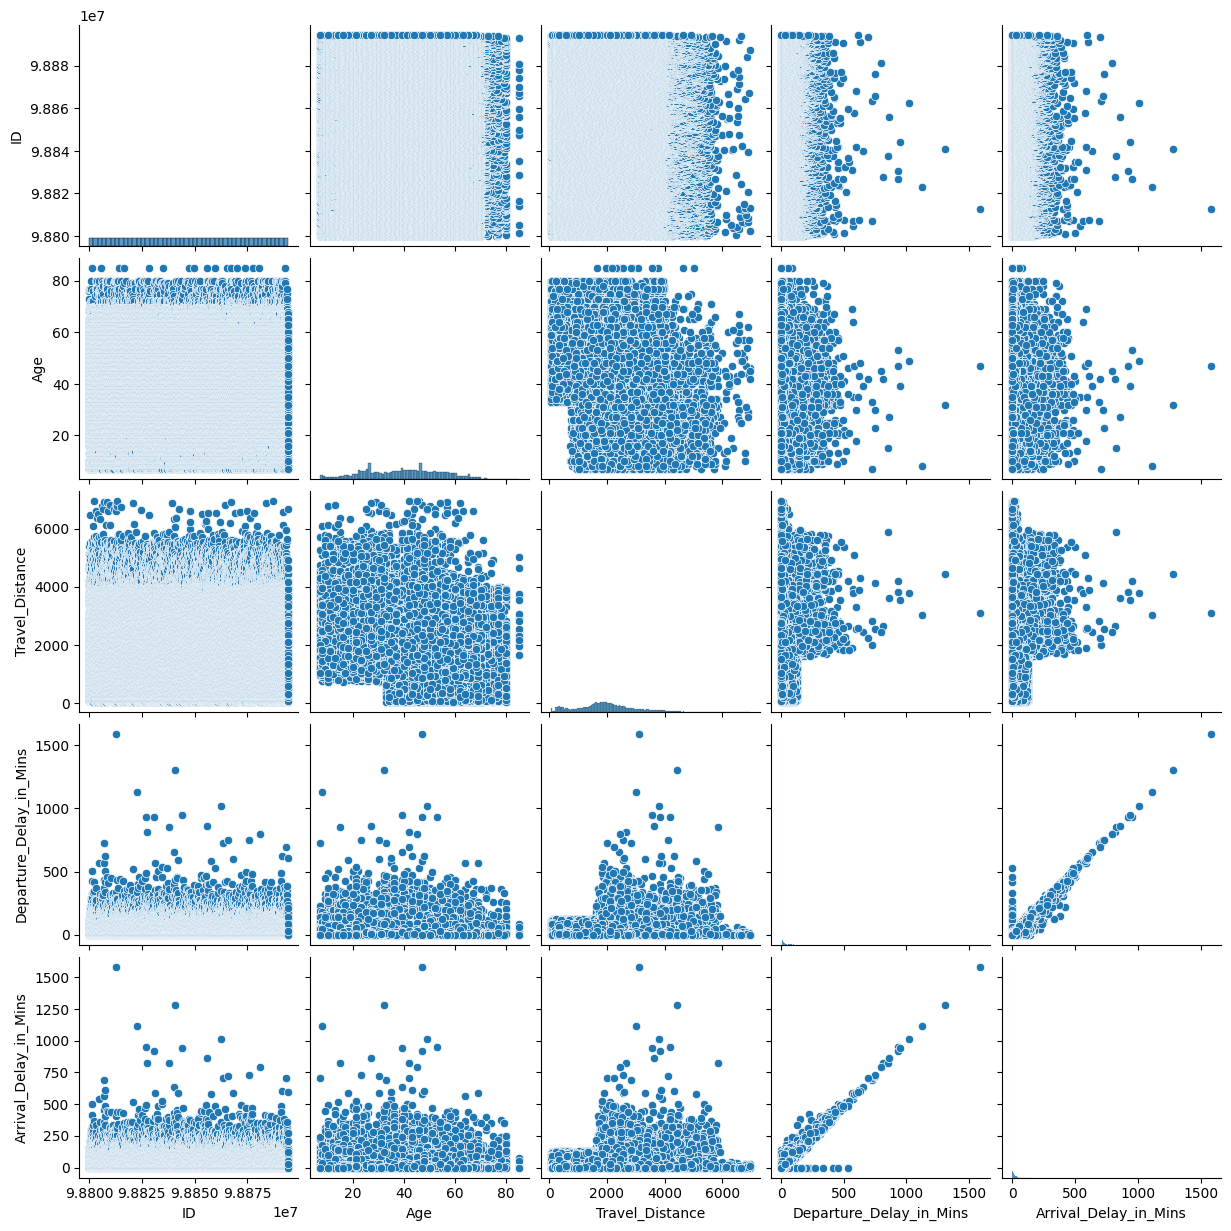

In [39]:
# set the figure size
plt.figure(figsize = (8,8))

# plot a pair plot
sns.pairplot(df_travel_train)

# display the plot
plt.show()

In the above plot I see there is a positive linear relationship between departure delay time and arrival delay time

In [40]:
# compute correlation
corr_matrix = df_travel_train.corr()

corr_matrix

ID       Age  Travel_Distance  \
ID                       1.000000 -0.002573         0.000878   
Age                     -0.002573  1.000000        -0.251517   
Travel_Distance          0.000878 -0.251517         1.000000   
Departure_Delay_in_Mins -0.000444 -0.007986         0.114078   
Arrival_Delay_in_Mins    0.001016 -0.010643         0.110896   

                         Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
ID                                     -0.000444               0.001016  
Age                                    -0.007986              -0.010643  
Travel_Distance                         0.114078               0.110896  
Departure_Delay_in_Mins                 1.000000               0.958940  
Arrival_Delay_in_Mins                   0.958940               1.000000

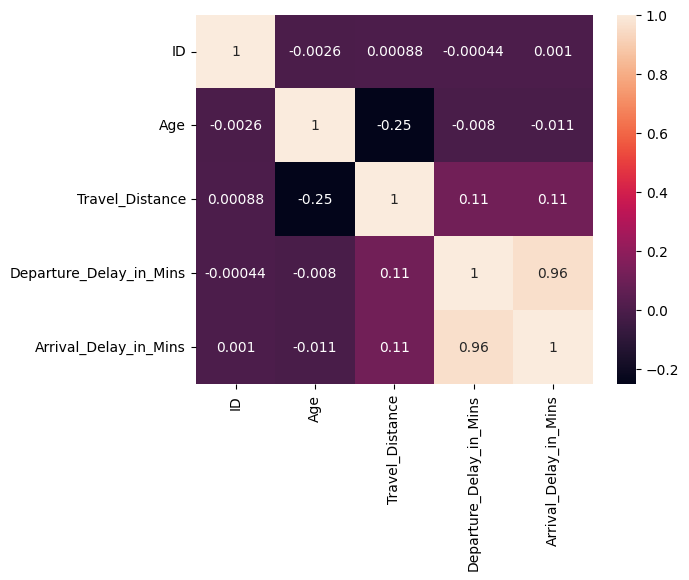

In [41]:
# plot heatmap
# 'annot=True' returns the correlation values
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

The above plot shows there is a slight relationship between departure delay time and travel distance as well as between arrival delay time and travel distance.

The above plot shows a strong relationship between departure delay time and arrival delay time.

In [42]:
# Display first five records of dataframe
df_survey_train.head()

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good

In [43]:
# Display last five records of dataframe
df_survey_train.tail()

ID  Overall_Experience       Seat_Comfort Seat_Class  \
94374  98894375                   0               Poor   Ordinary   
94375  98894376                   1               Good   Ordinary   
94376  98894377                   1  Needs Improvement  Green Car   
94377  98894378                   0  Needs Improvement   Ordinary   
94378  98894379                   0         Acceptable   Ordinary   

      Arrival_Time_Convenient           Catering  Platform_Location  \
94374                    Good               Good         Convenient   
94375                    Good               Good         Convenient   
94376       Needs Improvement  Needs Improvement  Needs Improvement   
94377                     NaN  Needs Improvement         Convenient   
94378                    Poor         Acceptable         Manageable   

      Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
94374                 Poor                  Poor           Poor   
94375    Needs Improvement             Excellent      Excellent   
94376                 Good             Excellent           Good   
94377                 Good     Needs Improvement           Good   
94378           Acceptable            Acceptable     Acceptable   

      Ease_of_Online_Booking Onboard_Service     Legroom Baggage_Handling  \
94374                   Poor            Good        Good             Good   
94375             Acceptable      Acceptable  Acceptable       Acceptable   
94376                   Good            Good        Good             Good   
94377                   Good      Acceptable        Good             Good   
94378             Acceptable            Poor        Good             Good   

         CheckIn_Service Cleanliness Online_Boarding  
94374  Needs Improvement        Good            Poor  
94375               Good  Acceptable            Good  
94376         Acceptable        Good      Acceptable  
94377               Good   Excellent            Good  
94378               Poor        Good      Acceptable

In [44]:
# Get shape of dataframe
df_survey_train.shape

(94379, 17)

In [45]:
df_survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [46]:
# Ensure Overall_Experience is treated as a categorical column instead of numerical
df_survey_train['Overall_Experience'] = df_survey_train['Overall_Experience'].astype('category')

<Axes: >

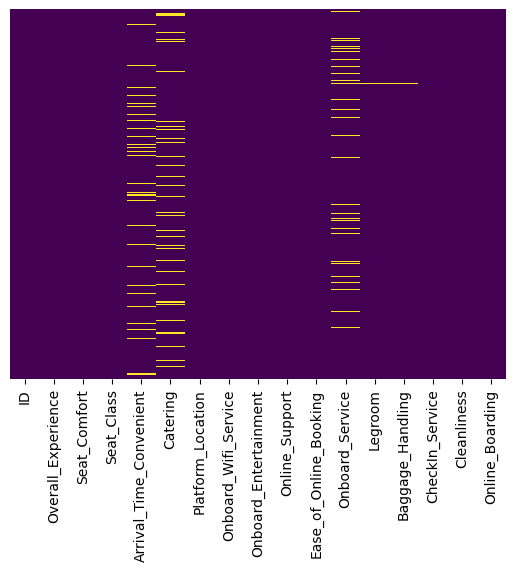

In [47]:
# Visualize if there are any missing values in the data
sns.heatmap(df_survey_train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [48]:
# Calculate missing ratio for each column
missing_ratio_survey = round(df_survey_train.isnull().sum() / len(df_survey_train) * 100,2)

print("Missing Ratio by Column:")
print(missing_ratio_survey)

Missing Ratio by Column:
ID                         0.00
Overall_Experience         0.00
Seat_Comfort               0.06
Seat_Class                 0.00
Arrival_Time_Convenient    9.46
Catering                   9.26
Platform_Location          0.03
Onboard_Wifi_Service       0.03
Onboard_Entertainment      0.02
Online_Support             0.10
Ease_of_Online_Booking     0.08
Onboard_Service            8.05
Legroom                    0.10
Baggage_Handling           0.15
CheckIn_Service            0.08
Cleanliness                0.01
Online_Boarding            0.01
dtype: float64


I see the ratio of missing data is less than 10%, which means that imputation is suitable

In [49]:
# Columns to impute with mode
columns_to_impute = df_survey_train.columns[df_survey_train.isnull().any()]

# Impute missing values with the mode for selected columns
for column in columns_to_impute:
    mode_value = df_survey_train[column].mode().iloc[0]
    df_survey_train[column].fillna(mode_value, inplace=True)

<Axes: >

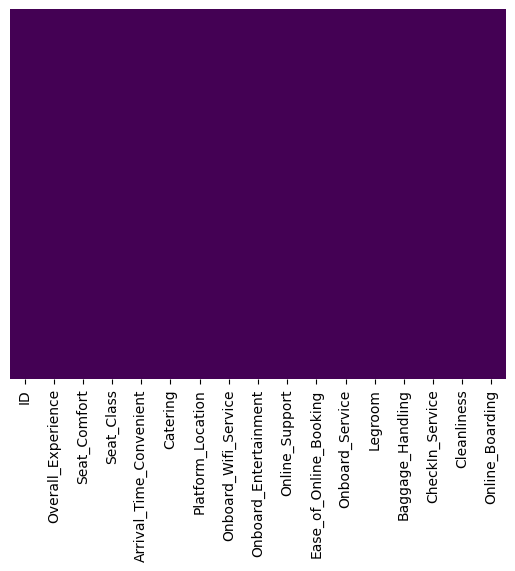

In [50]:
# Visualize if there are any missing values in the data
sns.heatmap(df_survey_train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [51]:
# Calculate missing ratio for each column
missing_ratio_test = round(df_survey_test.isnull().sum() / len(df_survey_test) * 100,2)

print("Missing Ratio by Column:")
print(missing_ratio_test)

Missing Ratio by Column:
ID                         0.00
Seat_Comfort               0.06
Seat_Class                 0.00
Arrival_Time_Convenient    9.34
Catering                   9.43
Platform_Location          0.03
Onboard_Wifi_Service       0.03
Onboard_Entertainment      0.02
Online_Support             0.07
Ease_of_Online_Booking     0.05
Onboard_Service            8.07
Legroom                    0.07
Baggage_Handling           0.11
CheckIn_Service            0.06
Cleanliness                0.01
Online_Boarding            0.01
dtype: float64


I see missing values in the test data set are less than 10%, which means imputation is also suitable in this case

In [52]:
# Columns to impute with mode
columns_to_impute = df_survey_test.columns[df_survey_test.isnull().any()]

# Impute missing values with the mode for selected columns
for column in columns_to_impute:
    mode_value = df_survey_test[column].mode().iloc[0]
    df_survey_test[column].fillna(mode_value, inplace=True)

<Axes: >

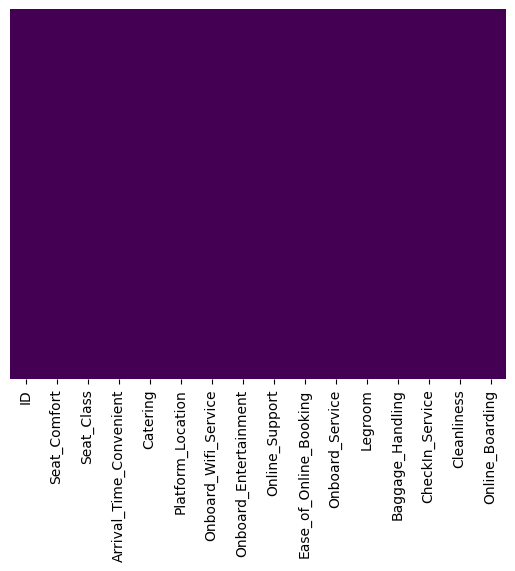

In [53]:
# Visualize if there are any missing values in the data
sns.heatmap(df_survey_test.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [54]:
df_survey_train.describe(include="all")

ID  Overall_Experience Seat_Comfort Seat_Class  \
count   9.437900e+04             94379.0        94379      94379   
unique           NaN                 2.0            6          2   
top              NaN                 1.0   Acceptable  Green Car   
freq             NaN             51593.0        21219      47435   
mean    9.884719e+07                 NaN          NaN        NaN   
std     2.724501e+04                 NaN          NaN        NaN   
min     9.880000e+07                 NaN          NaN        NaN   
25%     9.882360e+07                 NaN          NaN        NaN   
50%     9.884719e+07                 NaN          NaN        NaN   
75%     9.887078e+07                 NaN          NaN        NaN   
max     9.889438e+07                 NaN          NaN        NaN   

       Arrival_Time_Convenient    Catering Platform_Location  \
count                    94379       94379             94379   
unique                       6           6                 6   
top                       Good  Acceptable        Manageable   
freq                     28504       27209             24203   
mean                       NaN         NaN               NaN   
std                        NaN         NaN               NaN   
min                        NaN         NaN               NaN   
25%                        NaN         NaN               NaN   
50%                        NaN         NaN               NaN   
75%                        NaN         NaN               NaN   
max                        NaN         NaN               NaN   

       Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
count                 94379                 94379          94379   
unique                    6                     6              6   
top                    Good                  Good           Good   
freq                  22865                 30464          30107   
mean                    NaN                   NaN            NaN   
std                     NaN                   NaN            NaN   
min                     NaN                   NaN            NaN   
25%                     NaN                   NaN            NaN   
50%                     NaN                   NaN            NaN   
75%                     NaN                   NaN            NaN   
max                     NaN                   NaN            NaN   

       Ease_of_Online_Booking Onboard_Service Legroom Baggage_Handling  \
count                   94379           94379   94379            94379   
unique                      6               6       6                5   
top                      Good            Good    Good             Good   
freq                    28982           34866   28960            35086   
mean                      NaN             NaN     NaN              NaN   
std                       NaN             NaN     NaN              NaN   
min                       NaN             NaN     NaN              NaN   
25%                       NaN             NaN     NaN              NaN   
50%                       NaN             NaN     NaN              NaN   
75%                       NaN             NaN     NaN              NaN   
max                       NaN             NaN     NaN              NaN   

       CheckIn_Service Cleanliness Online_Boarding  
count            94379       94379           94379  
unique               6           6               6  
top               Good        Good            Good  
freq             26579       35433           25539  
mean               NaN         NaN             NaN  
std                NaN         NaN             NaN  
min                NaN         NaN             NaN  
25%                NaN         NaN             NaN  
50%                NaN         NaN             NaN  
75%                NaN         NaN             NaN  
max                NaN         NaN             NaN

Overall_Experience:
- There are two unique types of overall experience
- The most popular is satisfied, 1

Seat Comfort:
- There are six types of seat comfort
- The most popular is Acceptable

Seat Class:
- There are two types of seat class
- The most common is Green Car

Arrival Time Convenient:
- There are six types of arrival time
- The most popular is acceptable

Catering:
- Thre are six types of catering
- The most popular is acceptable

Platform Location:
- There are six types of platform location
- The most common one is manageable

Onboard Wifi Service:
- There are six types of wifi service
- The most common one is Good

Online Support:
- There are six types of online support
- The most common one is good

Ease of Online Booking:
- There are six types of online booking
- The most common one is good

Onboard Service:
- There are six types of onboard service
- The most common one is good

Legroom:
- There are six types of legroom
- The most common one is good

Baggage Handling:
- There are five types of baggage handling
- The most common one is good

Checkin Service:
- There are six types of checkin service
- The most popular one is good

Cleanliness:
- There are six types of cleanliness
- The most common one is good

Online boarding:
- There are six types of online boarding
- The most common one is good

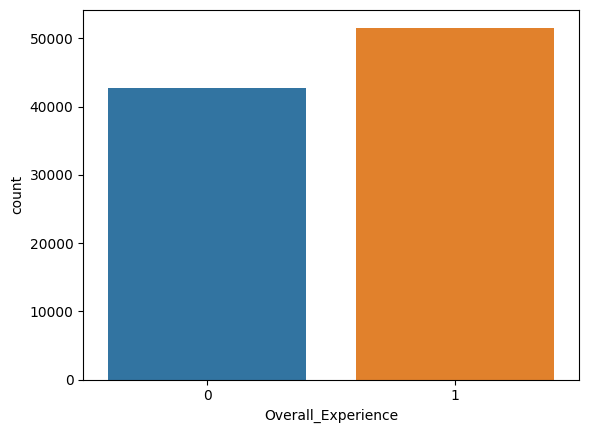

In [55]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Overall_Experience')

# show plot
plt.show()

I see there are slightly more customers satisfied than non-satisfied

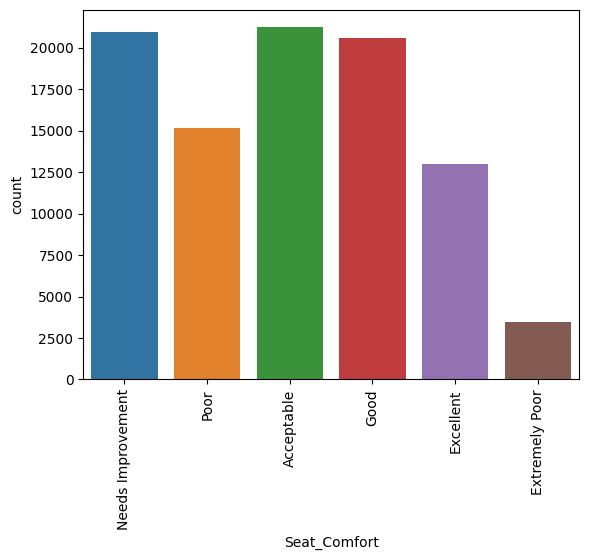

In [56]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Seat_Comfort')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

I see in the above plot acceptable is the most common seat comfort, followed by Needs Improvement and Good. The least common one was extremly poor

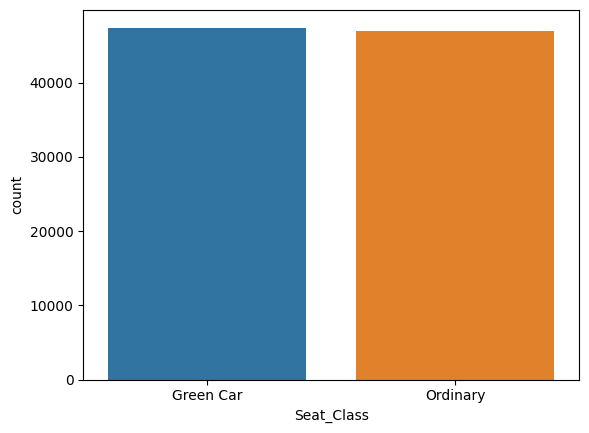

In [57]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Seat_Class')

# show plot
plt.show()

The plot shows that there is not a significant difference between the number of customers that selected green car and those that selected ordinary

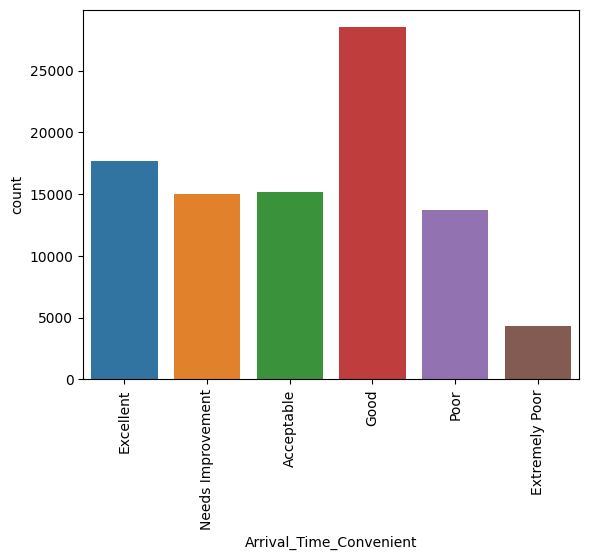

In [58]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Arrival_Time_Convenient')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()


The above plot shows that the most customers belive the arrival time was good. There is a good portion of customers that believe their arrival time is excellent and a small percentage believes their arrival time was extremely poor

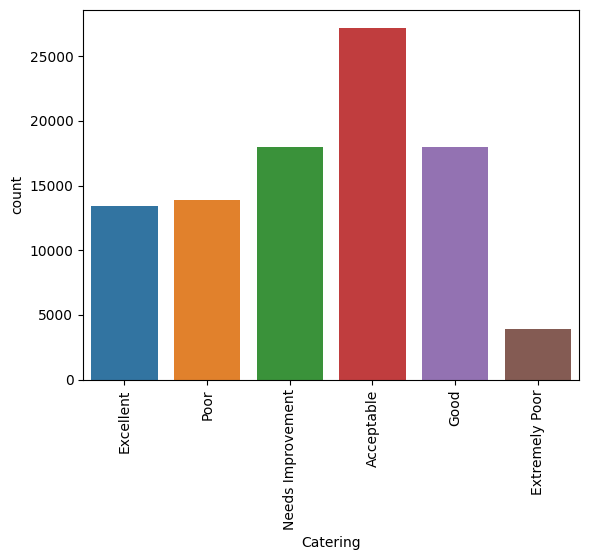

In [59]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Catering')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The above plot shows most passengers considered catering to be acceptable. A great number of passengers also thought catering was good and needed improvement. A small number of passengers thought catering was extremely poor.

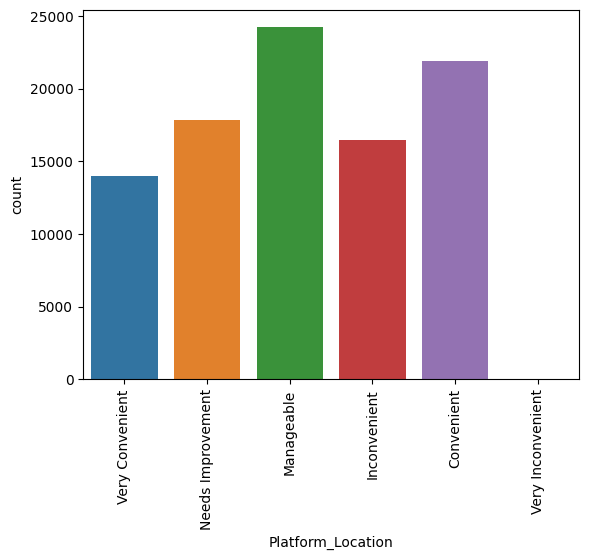

In [60]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Platform_Location')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The above plot shows that the majority of passengers thought the platfrom location was manageable. A great number of passengers also believe the location was convenient.

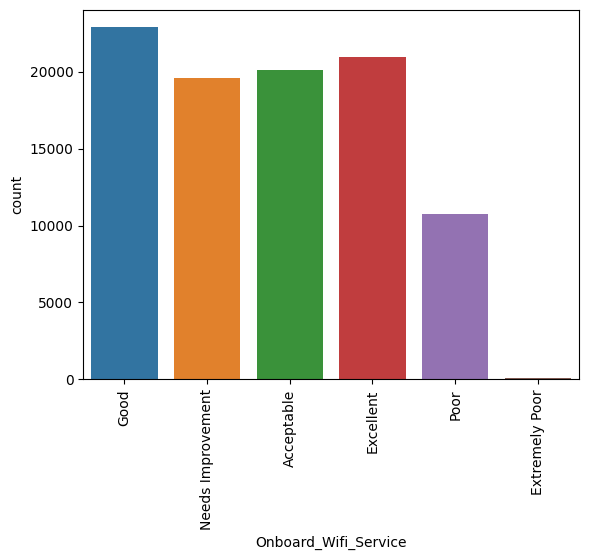

In [61]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Onboard_Wifi_Service')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The above plot shows that most customers believe the onboard wifi service is good. The second greatest number of customers believe the onboard wifi service is excellent. Almost none of the customers believed the onboard wifi service was extremely poor.

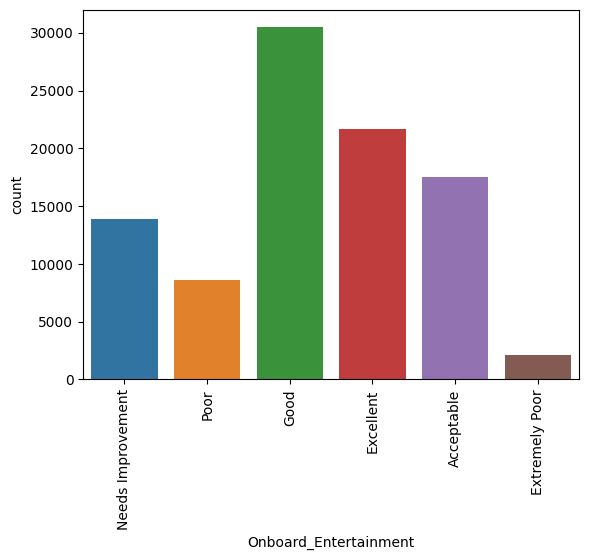

In [62]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Onboard_Entertainment')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The above chart shorts that most passengers considered the onboard entertainment was good. The second greatest number of passangers believed the onboard entertainment was excellent.

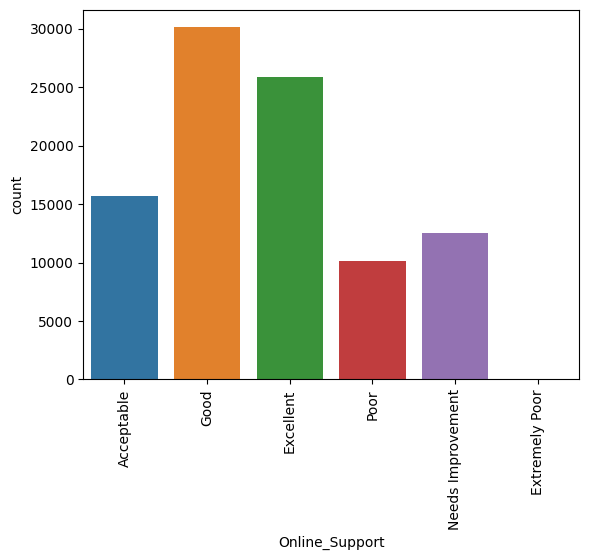

In [63]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Online_Support')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The above chart shows that most passengers believe that online support was good. The second highest number of passengers believe online support was excellent

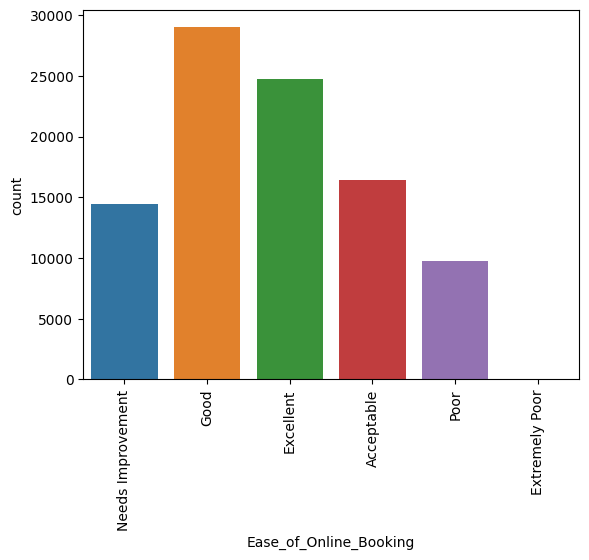

In [64]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Ease_of_Online_Booking')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The above chart shows that most passengers believed that the ease of online booking was good. The second highest number of passengers thought that the ease of onlne booking was excellent

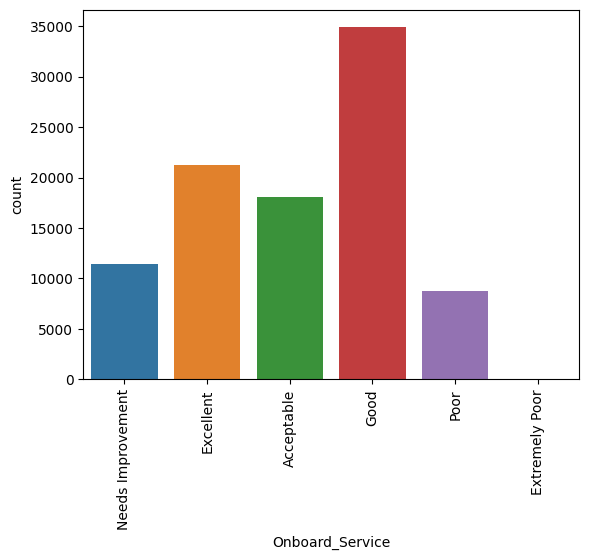

In [65]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Onboard_Service')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The above chart shows that most passengers thought onboard service was good. A great number of passengers thought that onboard service was excellent.

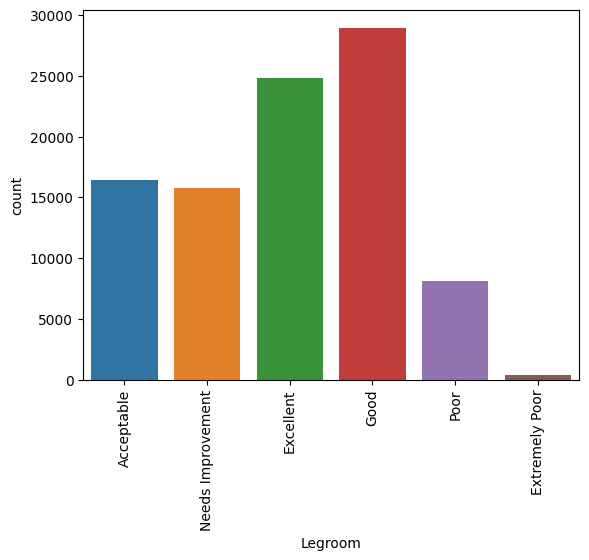

In [66]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Legroom')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The above chart shows that most passengers thought legroom was good. A high number of passengers also thought legroom was excellent.

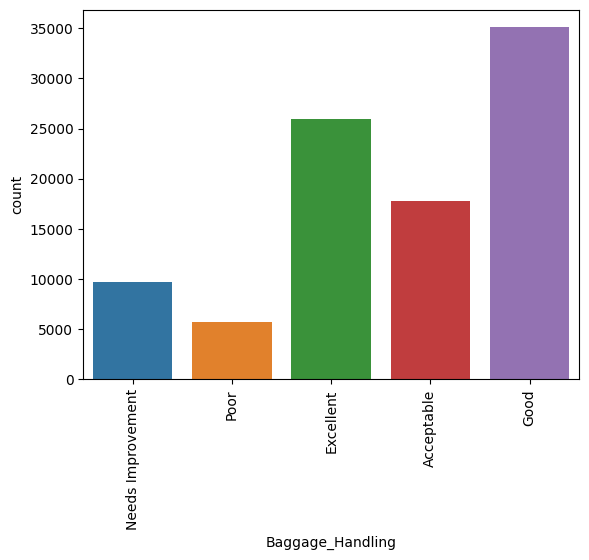

In [67]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Baggage_Handling')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The chart above shows most customers thought that baggage handling was good. A small number of passengers thougth baggage handling was poor

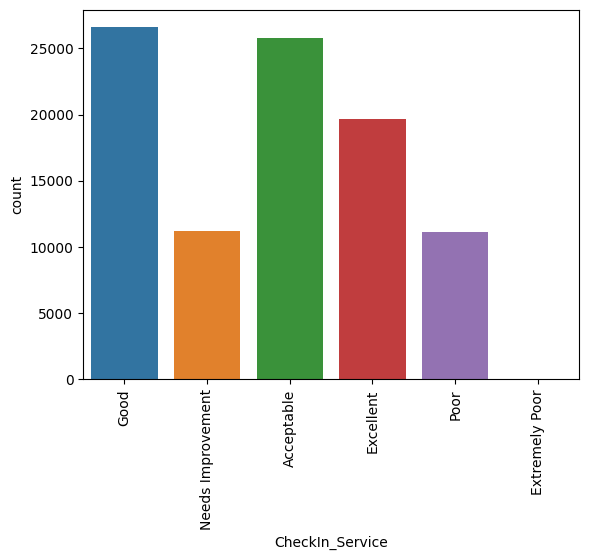

In [68]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='CheckIn_Service')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The above chart shows that there were almost as many passengers that thought checkin service was good as there were that thought checkin service was acceptable.

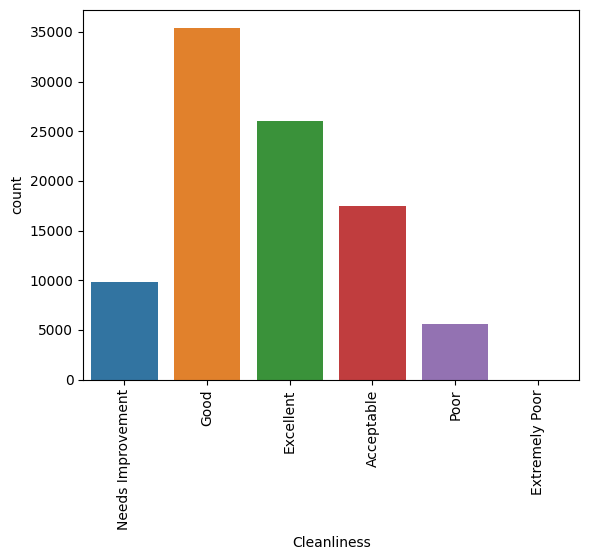

In [69]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Cleanliness')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The above plot shows that most passengers thought cleanliness was good. A small number of passengers thought cleanliness was poor.

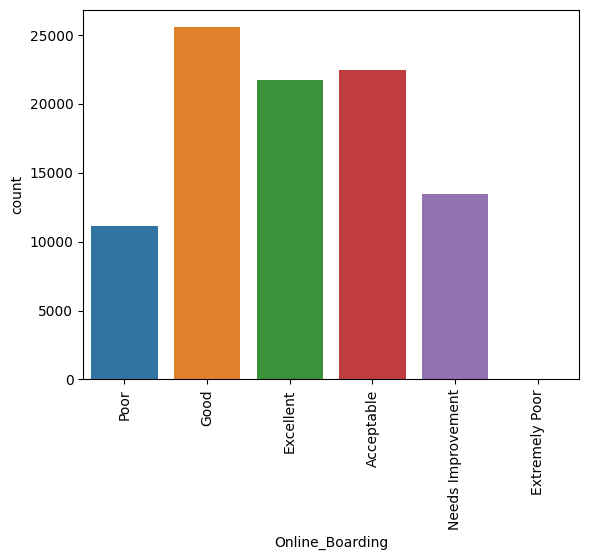

In [70]:
# plot a bar chart for rating
sns.countplot(data=df_survey_train,x='Online_Boarding')

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

The above plot shows most passengers thought online boarding was good.

In [71]:
df_travel_train.shape

(94379, 9)

In [72]:
df_travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94379 non-null  object 
 2   Customer_Type            94379 non-null  object 
 3   Age                      94379 non-null  float64
 4   Type_Travel              94379 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94379 non-null  float64
 8   Arrival_Delay_in_Mins    94379 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [73]:
df_survey_train.shape

(94379, 17)

In [74]:
df_survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Overall_Experience       94379 non-null  category
 2   Seat_Comfort             94379 non-null  object  
 3   Seat_Class               94379 non-null  object  
 4   Arrival_Time_Convenient  94379 non-null  object  
 5   Catering                 94379 non-null  object  
 6   Platform_Location        94379 non-null  object  
 7   Onboard_Wifi_Service     94379 non-null  object  
 8   Onboard_Entertainment    94379 non-null  object  
 9   Online_Support           94379 non-null  object  
 10  Ease_of_Online_Booking   94379 non-null  object  
 11  Onboard_Service          94379 non-null  object  
 12  Legroom                  94379 non-null  object  
 13  Baggage_Handling         94379 non-null  object  
 14  CheckI

In [75]:
df_survey_train.head()

ID Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                  0  Needs Improvement  Green Car   
1  98800002                  0               Poor   Ordinary   
2  98800003                  1  Needs Improvement  Green Car   
3  98800004                  0         Acceptable   Ordinary   
4  98800005                  1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement         Acceptable  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good

In [76]:
# Join train datasets
train_data = pd.merge(df_travel_train,df_survey_train, how = 'inner', on ='ID')

In [77]:
category_counts = train_data['Seat_Comfort'].value_counts()

print(category_counts)

Acceptable           21219
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64


In [78]:
train_data.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0  Business Travel     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   
1             2200                      9.0                    0.0   
2             1061                     77.0                  119.0   
3              780                     13.0                   18.0   
4             1981                      0.0                    0.0   

  Overall_Experience  ... Onboard_Wifi_Service Onboard_Entertainment  \
0                  0  ...                 Good     Needs Improvement   
1                  0  ...                 Good                  Poor   
2                  1  ...    Needs Improvement                  Good   
3                  0  ...           Acceptable     Needs Improvement   
4                  1  ...    Needs Improvement                  Good   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0     Acceptable      Needs Improvement  Needs Improvement         Acceptable   
1           Good                   Good          Excellent  Needs Improvement   
2      Excellent              Excellent          Excellent          Excellent   
3     Acceptable             Acceptable         Acceptable         Acceptable   
4      Excellent                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good  

[5 rows x 25 columns]

In [79]:
train_data.shape

(94379, 25)

In [80]:
# Join test datasets
test_data = pd.merge(df_travel_test,df_survey_test, how = 'inner', on ='ID')

In [81]:
test_data.head()

ID  Gender      Customer_Type   Age      Type_Travel Travel_Class  \
0  99900001  Female     Loyal Customer  36.0  Business Travel     Business   
1  99900002  Female  Disloyal Customer  21.0  Business Travel     Business   
2  99900003    Male     Loyal Customer  60.0  Business Travel     Business   
3  99900004  Female     Loyal Customer  29.0  Personal Travel          Eco   
4  99900005    Male  Disloyal Customer  18.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              532                      0.0                    0.0   
1             1425                      9.0                   28.0   
2             2832                      0.0                    0.0   
3             1352                      0.0                    0.0   
4             1610                     17.0                    0.0   

     Seat_Comfort  ... Onboard_Wifi_Service Onboard_Entertainment  \
0      Acceptable  ...    Needs Improvement             Excellent   
1  Extremely Poor  ...           Acceptable                  Poor   
2       Excellent  ...            Excellent             Excellent   
3      Acceptable  ...                 Poor            Acceptable   
4       Excellent  ...            Excellent             Excellent   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0           Good              Excellent          Excellent          Excellent   
1     Acceptable             Acceptable          Excellent         Acceptable   
2      Excellent      Needs Improvement  Needs Improvement  Needs Improvement   
3      Excellent                   Poor         Acceptable  Needs Improvement   
4      Excellent              Excellent               Good         Acceptable   

    Baggage_Handling CheckIn_Service        Cleanliness Online_Boarding  
0          Excellent            Good          Excellent            Poor  
1               Good      Acceptable          Excellent      Acceptable  
2  Needs Improvement            Good  Needs Improvement       Excellent  
3          Excellent       Excellent          Excellent            Poor  
4          Excellent       Excellent          Excellent       Excellent  

[5 rows x 24 columns]

In [82]:
test_data.shape

(35602, 24)

In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Gender                   94379 non-null  object  
 2   Customer_Type            94379 non-null  object  
 3   Age                      94379 non-null  float64 
 4   Type_Travel              94379 non-null  object  
 5   Travel_Class             94379 non-null  object  
 6   Travel_Distance          94379 non-null  int64   
 7   Departure_Delay_in_Mins  94379 non-null  float64 
 8   Arrival_Delay_in_Mins    94379 non-null  float64 
 9   Overall_Experience       94379 non-null  category
 10  Seat_Comfort             94379 non-null  object  
 11  Seat_Class               94379 non-null  object  
 12  Arrival_Time_Convenient  94379 non-null  object  
 13  Catering                 94379 non-null  object  
 14  Platfo

In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35602 non-null  object 
 2   Customer_Type            35602 non-null  object 
 3   Age                      35602 non-null  float64
 4   Type_Travel              35602 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35602 non-null  float64
 9   Seat_Comfort             35602 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  35602 non-null  object 
 12  Catering                 35602 non-null  object 
 13  Platform_Location        35602 non-null  object 
 14  Onboard_Wifi_Service  

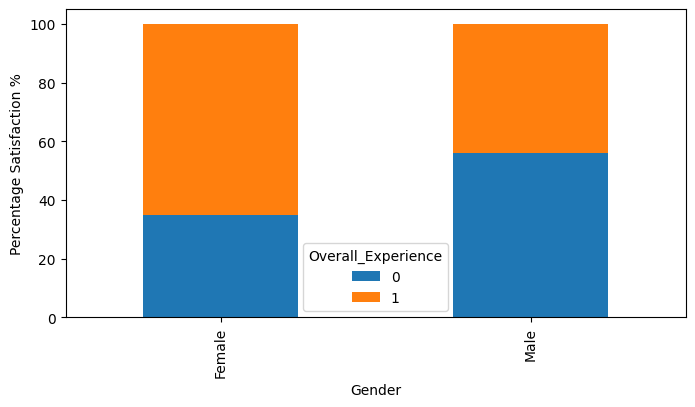

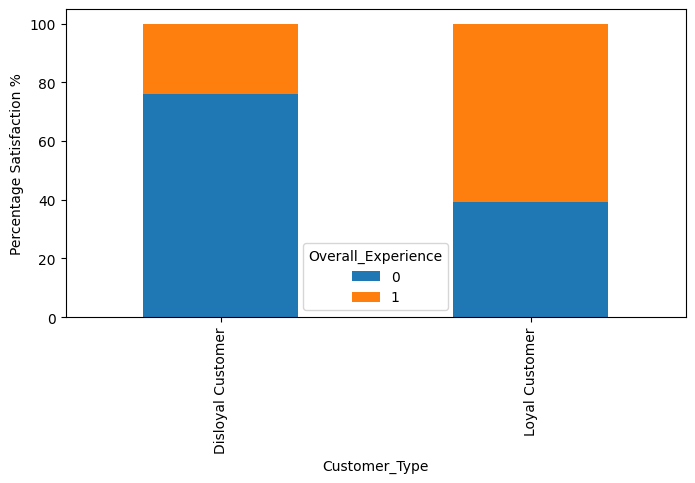

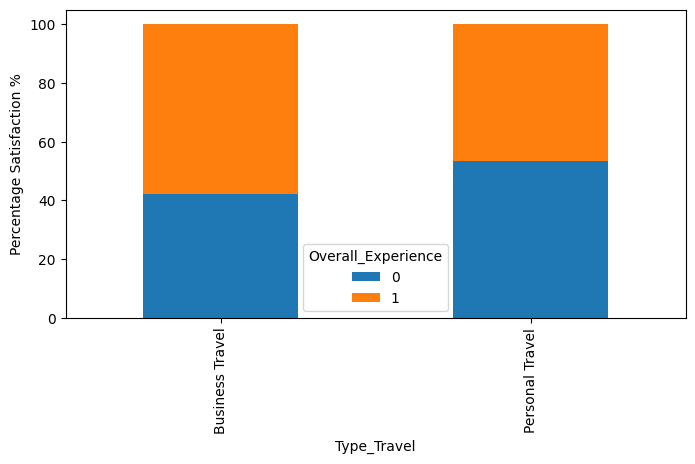

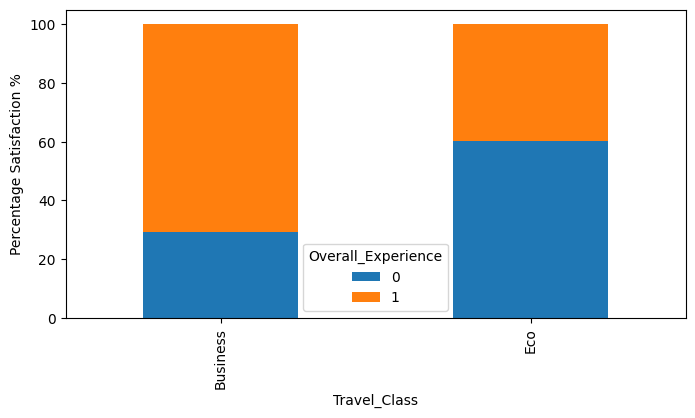

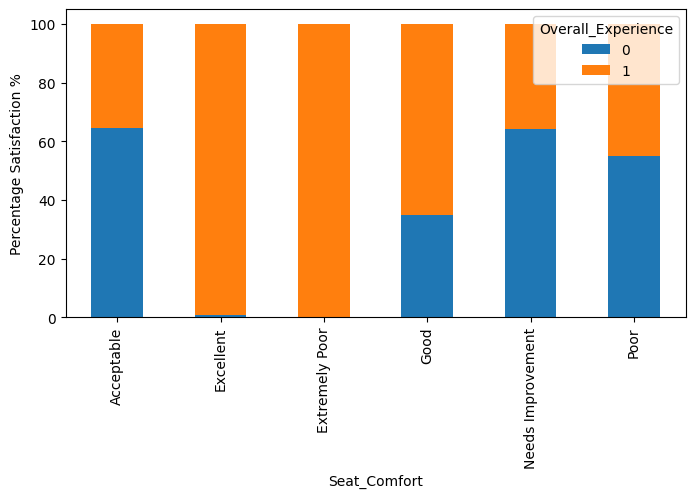

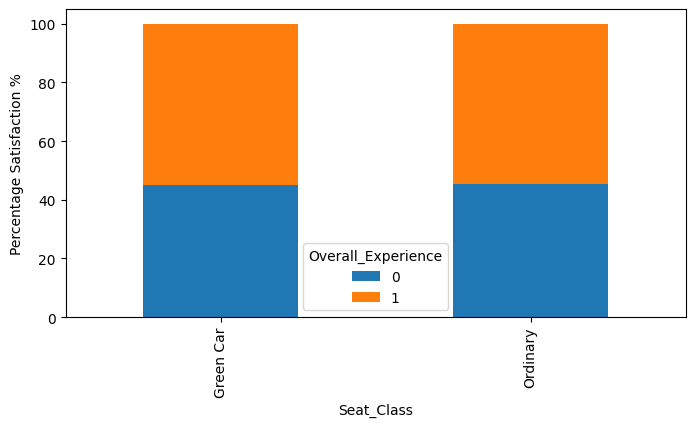

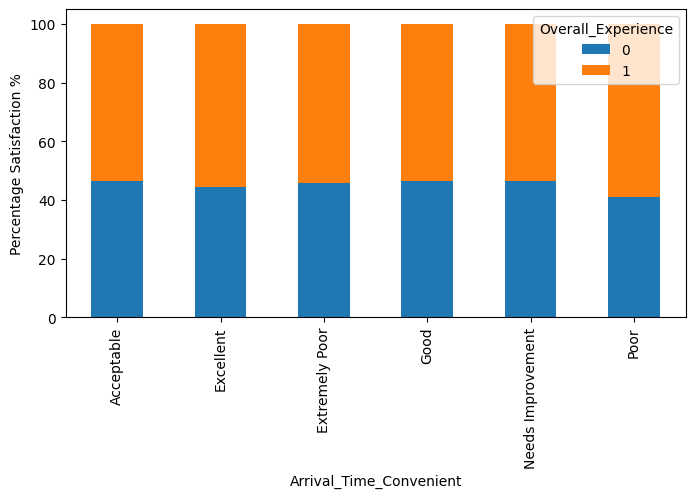

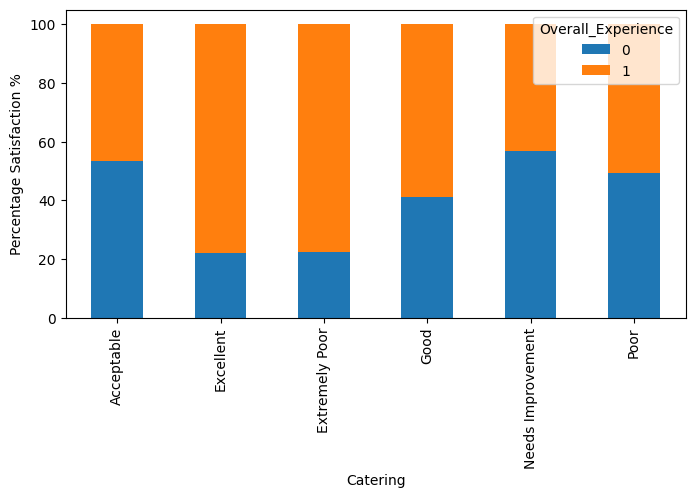

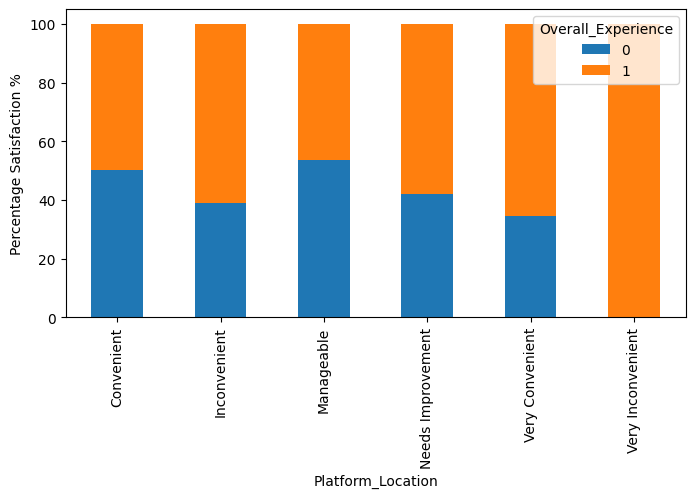

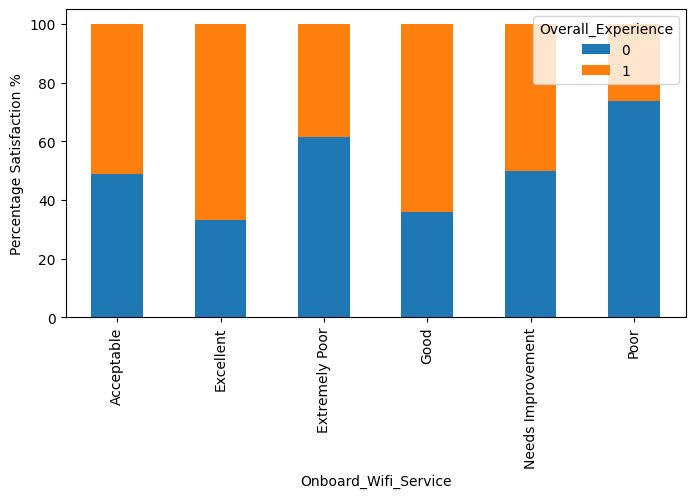

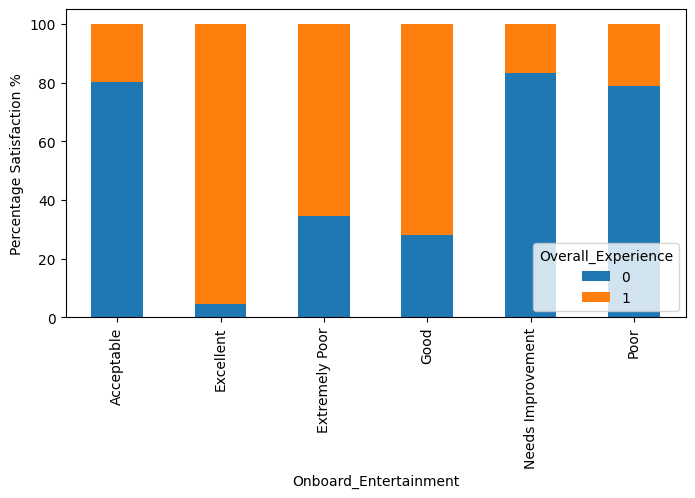

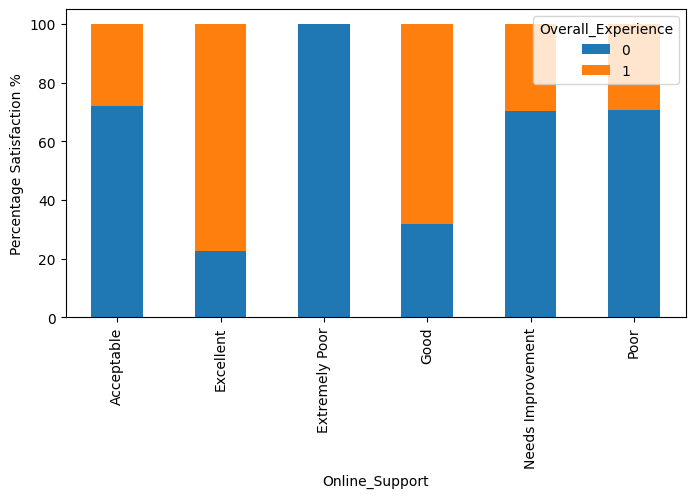

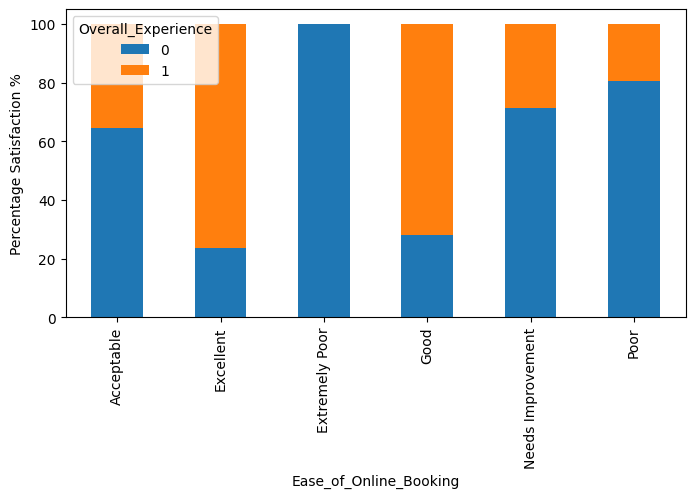

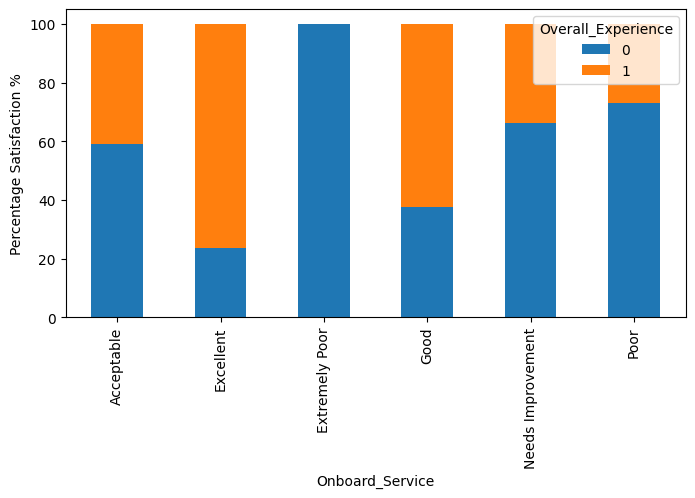

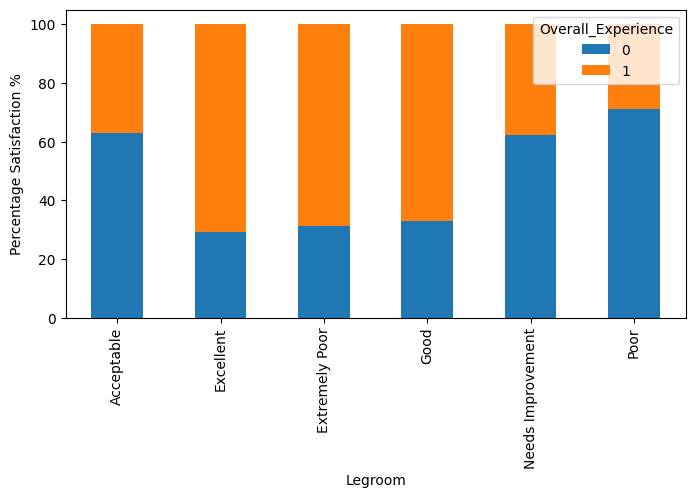

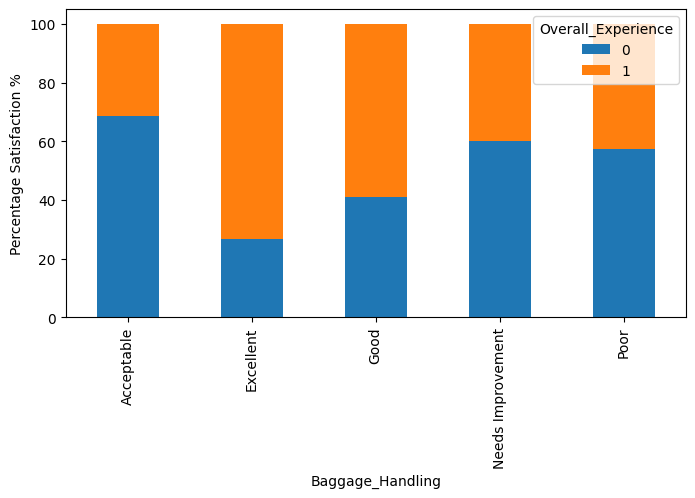

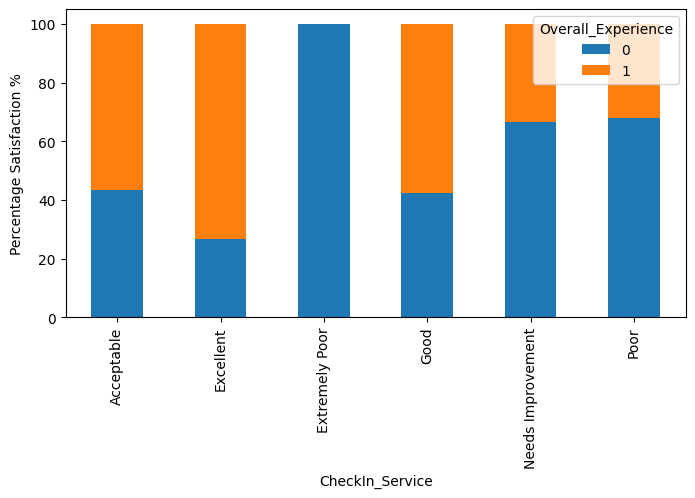

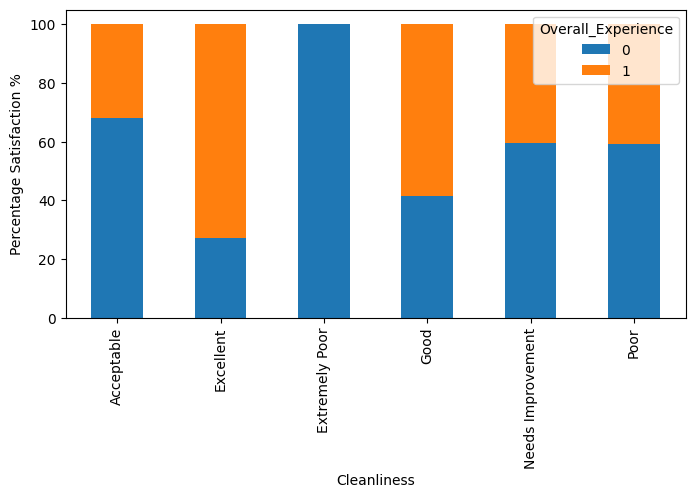

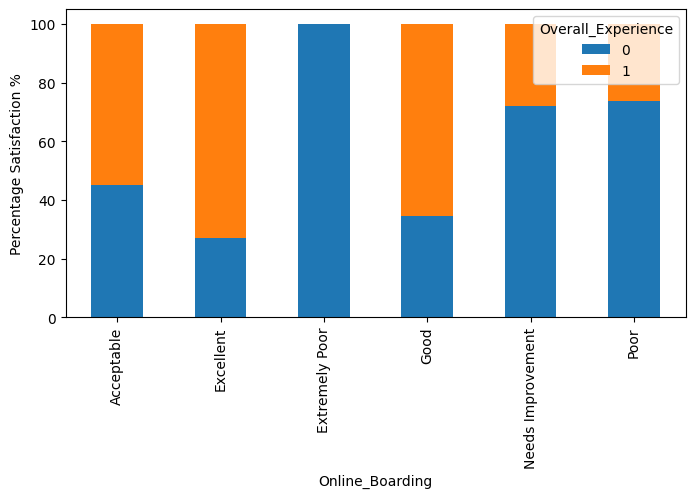

In [85]:
# Check Overall Experience relationship with other categorical variables
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

for i in categorical_columns:
    if i != 'Overall_Experience':
        (pd.crosstab(train_data[i], train_data['Overall_Experience'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Satisfaction %')


Observations:
- The percentage of females to have a satisfactory experience is greater than the percentage of males
- The percentage of loyal customers that had a satisfactory experience is greater than the percetage of that did not have a satisfactory experience
- The percentage of passengers that travel for business is and had a satisfactory experience is slighty higher than the percentage of passengers that did not have a satisfactory experience
- The percentage of passengers that travel on business class and that had a satisfactory experience is greater than the percentage of passengers that did not have a satisfactory experience
- The percentage of passengers that traveled with access to an excellent seat comfort that had a satisfactory experience is significantly greater than those that did not have a satisfactory experience.
- The percentage of passengers that travel with access to an extremly poor seat comfort and that had a satisfactory experience is tremendously greater than those that did not have a satisfactory experience
- The percentage of passengers that had an ordinary seat class and had a satisfactory experience is relatively the same as the percentage of passengers that had a satisfactory experience
- The percentage of passengers that had a convenient arrival time and had a satisfactory experience is relatively the same as those that had an unsatisfactory experience
- The percentage of passengers that had excellent catering and had a satisfactory experience is greater than those that did not have a satisfactory experience
- The percentage of passengers that had a very inconvenient platform location and had a satisfactory experience is significantly greater than those that did not have a satisfactory experience
- The percentage of passengers that had a very convenient platform location and had a satisfactory experience is significantly greater than those that did not have a satisfactory experience
- The percentage of passengers that had excellent onboard wifi service and had a satisfactory experience is greater than those that did not have a satisfactory experience
- The percentage of passengers that had excellent onboard entertainment and had a satisfactory experience is significantly greater than those that had an unsatisfactory experience
- The percentage of passengers that had excellent onboard support and had a satisfactory experience is greater than those that had an unsatisfactory experience
- The percentage of passengers that had excellent ease of online booking and had a satisfactory experience is greater than those that did not have a satisfactory experience
- The percentage of passengers that had excellent onboard service and a satisfactory experience is greater than those that had an unsatisactory experience
- Almost all passengers that had extremly poor onboard service had an unsatisfactory experience
- The percentage of passengers that had poor legroom and had unsatisfactory experience is greater than those that had a satisfactory experience
- The percentage of passengers that had excellent baggage handling and had a satisfactory experience is greater than those that had an unsatisfactory experience
- Almost all passengers that had extremely poor checkin service had an unsatisfactory experience
- Almost all passengers that considered that their had extremly poor cleanliness had an unsatisfactory experience
- Almost all passengers that had extremely poor online boarding had an unsatisfactory experience

I notice that online boarding, cleanliness, checkin service, onboard service, ease of online booking, and online support are services that when delivered poorly, they can provide an unsatisfactory experience for passengers.

When onboard entertainment and seat comfort are delivered in an excellent manner, they can create a satisfactory experience for customers. However, this is not always the case as there is a great number of instances when extermly poor onboard entertainment is provided, but passengers still have a satisfactory experience. There are similar instances for seat comfort.


**Preparing data for modeling**

In [86]:
# Calculate missing ratio for each column
missing_ratio_train = round(train_data.isnull().sum() / len(train_data) * 100,2)

print("Missing Ratio by Column:")
print(missing_ratio_train)

Missing Ratio by Column:
ID                         0.0
Gender                     0.0
Customer_Type              0.0
Age                        0.0
Type_Travel                0.0
Travel_Class               0.0
Travel_Distance            0.0
Departure_Delay_in_Mins    0.0
Arrival_Delay_in_Mins      0.0
Overall_Experience         0.0
Seat_Comfort               0.0
Seat_Class                 0.0
Arrival_Time_Convenient    0.0
Catering                   0.0
Platform_Location          0.0
Onboard_Wifi_Service       0.0
Onboard_Entertainment      0.0
Online_Support             0.0
Ease_of_Online_Booking     0.0
Onboard_Service            0.0
Legroom                    0.0
Baggage_Handling           0.0
CheckIn_Service            0.0
Cleanliness                0.0
Online_Boarding            0.0
dtype: float64


In [87]:
# Calculate missing ratio for each column
missing_ratio_test = round(test_data.isnull().sum() / len(test_data) * 100,2)

print("Missing Ratio by Column:")
print(missing_ratio_test)

Missing Ratio by Column:
ID                         0.00
Gender                     0.00
Customer_Type              0.00
Age                        0.00
Type_Travel                0.00
Travel_Class               0.00
Travel_Distance            0.00
Departure_Delay_in_Mins    0.08
Arrival_Delay_in_Mins      0.00
Seat_Comfort               0.00
Seat_Class                 0.00
Arrival_Time_Convenient    0.00
Catering                   0.00
Platform_Location          0.00
Onboard_Wifi_Service       0.00
Onboard_Entertainment      0.00
Online_Support             0.00
Ease_of_Online_Booking     0.00
Onboard_Service            0.00
Legroom                    0.00
Baggage_Handling           0.00
CheckIn_Service            0.00
Cleanliness                0.00
Online_Boarding            0.00
dtype: float64


In [88]:
# Get a list of categorical variables
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
for c in categorical_columns:
  print(c)

Categorical Columns:
Gender
Customer_Type
Type_Travel
Travel_Class
Seat_Comfort
Seat_Class
Arrival_Time_Convenient
Catering
Platform_Location
Onboard_Wifi_Service
Onboard_Entertainment
Online_Support
Ease_of_Online_Booking
Onboard_Service
Legroom
Baggage_Handling
CheckIn_Service
Cleanliness
Online_Boarding


In [89]:
# Get a list of categorical variables
categorical_columns_test = test_data.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
for c in categorical_columns_test:
  print(c)

Categorical Columns:
Gender
Customer_Type
Type_Travel
Travel_Class
Seat_Comfort
Seat_Class
Arrival_Time_Convenient
Catering
Platform_Location
Onboard_Wifi_Service
Onboard_Entertainment
Online_Support
Ease_of_Online_Booking
Onboard_Service
Legroom
Baggage_Handling
CheckIn_Service
Cleanliness
Online_Boarding


In [90]:
# Creating dummy variables
df = pd.get_dummies(data = train_data, columns = categorical_columns, drop_first = True)

In [91]:
# Creating dummy variables
df_test = pd.get_dummies(data = test_data, columns = categorical_columns_test, drop_first = True)

In [92]:
# Separating the target variable and other variables
Y = df.Overall_Experience
X = df.drop(columns = ['Overall_Experience'])

In [93]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [94]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [95]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Satisfactory', 'Satisfactory'], yticklabels = ['Not Satisfactory', 'Satisfactory'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

**Logistic Regression Model Building**

In [95]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     29950
           1       0.91      0.91      0.91     36115

    accuracy                           0.90     66065
   macro avg       0.90      0.90      0.90     66065
weighted avg       0.90      0.90      0.90     66065



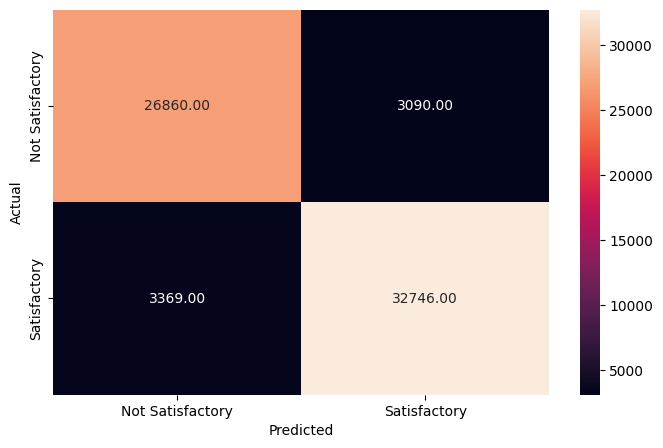

In [96]:
# Checking the performance on the training data
y_pred_train_lg = lg.predict(x_train)

metrics_score(y_train, y_pred_train_lg)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12836
           1       0.91      0.91      0.91     15478

    accuracy                           0.90     28314
   macro avg       0.90      0.90      0.90     28314
weighted avg       0.90      0.90      0.90     28314



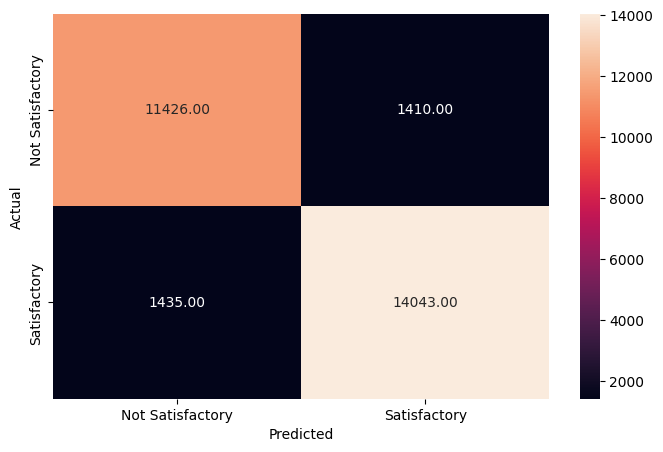

In [97]:
# Checking the performance on the test dataset
y_pred_test_lg = lg.predict(x_test)
metrics_score(y_test, y_pred_test_lg)

We are getting an accuracy of about 90% on the train and test dataset.

The recall for this model is only about 91% for class 1 (satisfactory experience). This high recall values indicates that the model will perform well in differentiating out passengers that have a high chance of having an unsatisfactory experience.

This model is good at identifying passengers that are at risk of having an unsatisfactory experience.

In [98]:
# Let's check the coefficients and find which variables are leading to satisfaction and which can reduce satisfcation
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

coef_df = pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(coef_df)

                                                  0
Seat_Comfort_Extremely Poor                2.357524
Seat_Comfort_Excellent                     1.985156
Onboard_Entertainment_Excellent            1.310630
Onboard_Entertainment_Good                 0.889639
Customer_Type_Loyal Customer               0.841710
Online_Support_Excellent                   0.631160
Online_Support_Poor                        0.446372
Baggage_Handling_Excellent                 0.435650
Seat_Comfort_Good                          0.434674
Cleanliness_Excellent                      0.403862
Legroom_Excellent                          0.378003
Online_Support_Needs Improvement           0.363200
Online_Support_Good                        0.361795
Legroom_Good                               0.314176
Onboard_Service_Excellent                  0.273052
Baggage_Handling_Good                      0.260617
CheckIn_Service_Excellent                  0.212365
Baggage_Handling_Needs Improvement         0.204811
Cleanliness_

Features that positively impact a satisfactory experience for passengers:
- Seat_Comfort_Excellent                    
- Onboard_Entertainment_Excellent           
- Onboard_Entertainment_Good                 
- Customer_Type_Loyal Customer               
- Online_Support_Excellent

Features that negatively impact a satisfactory experience for passengers:
- Arrival_Time_Convenient_Excellent
- Ease_of_Online_Booking_Poor
- Ease_of_Online_Booking_Needs Improvement
- Catering_Extremely Poor
- Arrival_Delay_in_Mins

In [99]:
# convert the log of odds into odds by taking its exponential.
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
odds_df = pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(odds_df)

                                                odds
Seat_Comfort_Extremely Poor                10.564764
Seat_Comfort_Excellent                      7.280182
Onboard_Entertainment_Excellent             3.708509
Onboard_Entertainment_Good                  2.434252
Customer_Type_Loyal Customer                2.320332
Online_Support_Excellent                    1.879789
Online_Support_Poor                         1.562632
Baggage_Handling_Excellent                  1.545967
Seat_Comfort_Good                           1.544459
Cleanliness_Excellent                       1.497597
Legroom_Excellent                           1.459367
Online_Support_Needs Improvement            1.437924
Online_Support_Good                         1.435904
Legroom_Good                                1.369130
Onboard_Service_Excellent                   1.313968
Baggage_Handling_Good                       1.297730
CheckIn_Service_Excellent                   1.236599
Baggage_Handling_Needs Improvement          1.

The odds of a passenger that has access to an excellent seat comfort to have a satisactory experience are 7.3 times the odds of a passenger that does not have access to one.

The odds of a passenger that has excellent onboard entertainment to have a satisactory experience are 3.7 times the odds of a passenger that does not have access to one.

The odds of a passenger that has excellent online support to have a satisactory experience are 1.9 times the odds of a pasenger
that does not have access to one.

**The Precision-Recall Curve for Logistic Regression**

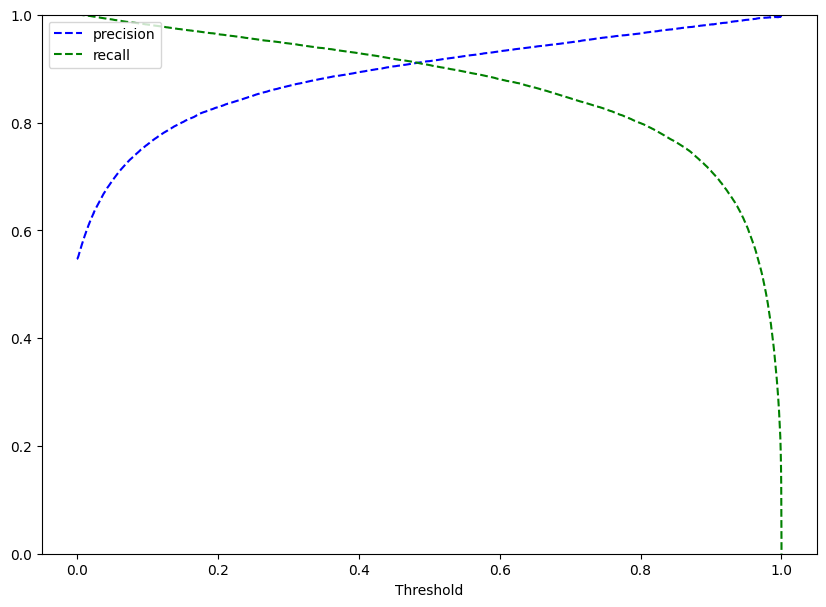

In [100]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

The above plot shows that the precision and the recall are balanced for a threshold of about 0.5

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     29950
           1       0.91      0.91      0.91     36115

    accuracy                           0.90     66065
   macro avg       0.90      0.90      0.90     66065
weighted avg       0.90      0.90      0.90     66065



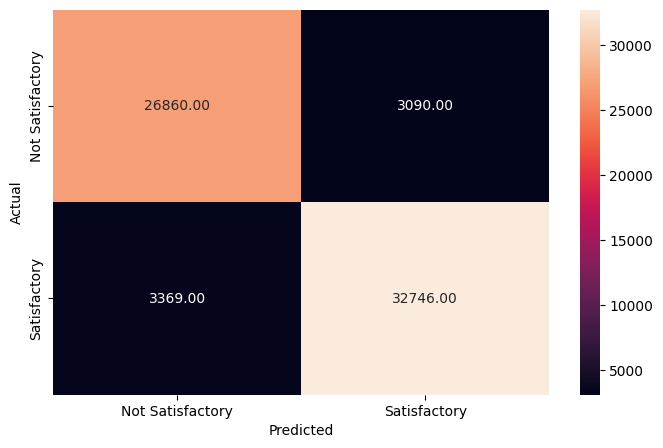

In [101]:
# Performance of model at threshold of 0.5
optimal_threshold1 = .5

y_pred_train_lg = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train_lg[:, 1] > optimal_threshold1)

The model do not significantly improve on the training dataset

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12836
           1       0.91      0.91      0.91     15478

    accuracy                           0.90     28314
   macro avg       0.90      0.90      0.90     28314
weighted avg       0.90      0.90      0.90     28314



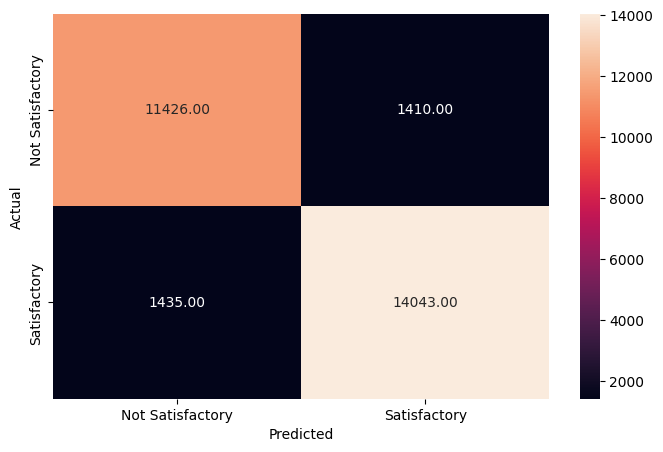

In [102]:
optimal_threshold1 = .5

y_pred_test_lg = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test_lg[:, 1] > optimal_threshold1)

The model did not significantly improve on test dataset.

**Support Vector Machine Model Building**

In [96]:
from sklearn.svm import SVC
model_svm = SVC() # Default parameters
model_svm.fit(x_train,y_train)

SVC()

In [96]:
predictions = model_svm.predict(x_test)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     29950
           1       0.97      0.96      0.96     36115

    accuracy                           0.96     66065
   macro avg       0.96      0.96      0.96     66065
weighted avg       0.96      0.96      0.96     66065



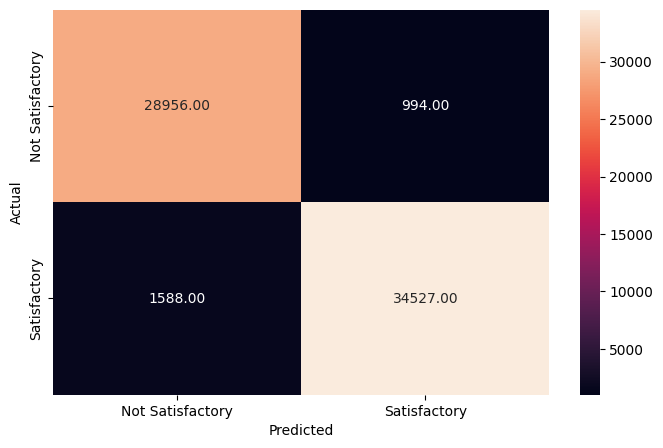

In [99]:
# Checking the performance on the training data
y_pred_train_svm = model_svm.predict(x_train)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12836
           1       0.96      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



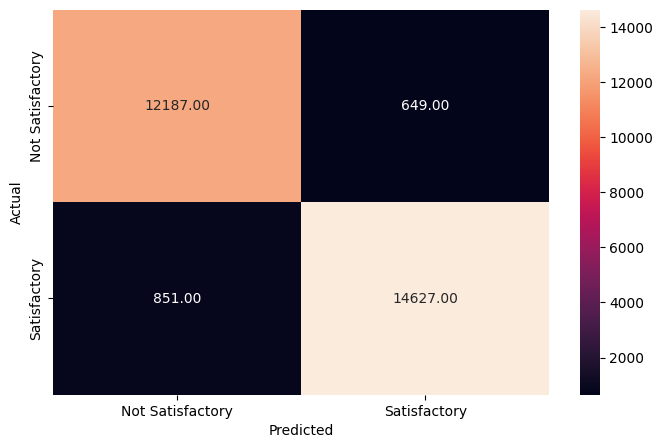

In [100]:
# Checking the performance on the test dataset
y_pred_test_svm = model_svm.predict(x_test)
metrics_score(y_test, y_pred_test_svm)

**Hyperparameter tunning for SVM**

Given larger computational resources, the below code block would find optimal parameters for SVM

In [110]:
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# param_dist = {
#     'C': np.logspace(-1, 1, 3),  # Use a range of values in a logarithmic scale
#     'gamma': ["auto", "scale"],
#     'kernel': ['linear', 'rbf']
# }

# n_iter = min(50, np.prod([len(param_dist[param]) for param in param_dist]))

# random_search = RandomizedSearchCV(
#     SVC(),
#     param_distributions=param_dist,
#     n_iter=n_iter,
#     cv=3,
#     n_jobs =-1
# )
# # Fit the RandomizedSearchCV object to your data
# random_search.fit(x_train_fe, y_train_fe)

# random_search.best_params_

# random_search.best_estimator_

# # Checking the performance on the training data
# random_search_predictions_train = random_search.predict(x_train)
# metrics_score(y_train, random_search_predictions_train)

# # Checking the performance on the test dataset
# random_search_predictions_test = random_search.predict(x_test)
# metrics_score(y_test, random_search_predictions_test)

Another option that only uses 0.15 computational units to find optimal parameters for SVM model is the below code block

In [111]:
# from sklearn.model_selection import RandomizedSearchCV
# import multiprocessing

# # Define the parameter search space
# param_dist = {
#     'C': np.logspace(-1, 1, 3),
#     'gamma': ["auto", "scale"],
#     'kernel': ['linear', 'rbf']
# }

# # Reduce the number of iterations based on search space size
# n_iter = min(10, np.prod([len(param_dist[param]) for param in param_dist]))

# # Create a function to perform the search and return the best model
# def perform_random_search(seed):
#     random_search = RandomizedSearchCV(
#         SVC(),
#         param_distributions=param_dist,
#         n_iter=n_iter,
#         cv=3,
#         verbose=0,
#         random_state=seed
#     )
#     random_search.fit(x_train, y_train)
#     return random_search.best_estimator_

# # Use multiprocessing to parallelize the search
# num_processes = int(multiprocessing.cpu_count() * 0.15)  # Using 0.15 computer units
# pool = multiprocessing.Pool(processes=num_processes)
# random_seeds = np.random.randint(0, 1000, num_processes)
# best_estimators = pool.map(perform_random_search, random_seeds)
# pool.close()
# pool.join()

# # Choose the best model among the parallel searches
# best_model = max(best_estimators, key=lambda model: model.score(x_train, y_train))


# # Fit the best model on the entire training dataset
# best_model.fit(x_train, y_train)

# # Checking the performance on the training data
# random_search_predictions_train = best_model.predict(x_train)
# metrics_score(y_train, random_search_predictions_train)

# # Checking the performance on the test dataset
# random_search_predictions_test = best_model.predict(x_test)
# metrics_score(y_test, random_search_predictions_test)


**K Nearest Neighbor**

In [113]:
# Create instance of KNeighborsClassifier class
knn = KNeighborsClassifier()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K
train_error = []
test_error = []

# Initialize an empty dictionary knn_many_split to store error rates for different values of 'k'
knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

# Iterate over range from 1 to 14
for k in range(1, 15):
    # Initialize empty lists to store error values for current k
    train_error = []
    test_error = []
    lista = []

    knn = KNeighborsClassifier(n_neighbors = k)

    for i in range(15):
        # Split training data into training and validation sets
        x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size = 0.20)

        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)

        # Append calculated error on the train_error and test_error lists
        train_error.append(1 - knn.score(x_train_new, y_train_new))

        # Append calculated errors on the train_error and test_error lists
        test_error.append(1 - knn.score(x_val, y_val))

    # Calculate mean of the train error and test error
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))

    knn_many_split[k] = lista

# Contains mean train and test error rates for different values of k
knn_many_split

{1: [0.0, 0.08178813794495321],
 2: [0.04303842175635107, 0.08600620600923334],
 3: [0.03917227982542445, 0.07614722873937284],
 4: [0.05189333736976211, 0.0776962082797245],
 5: [0.050826206513786915, 0.07322081788137945],
 6: [0.05633593178435379, 0.07393223845202955],
 7: [0.055133832841393574, 0.07230253033628496],
 8: [0.05853200131183934, 0.07305431519463154],
 9: [0.05842099952067407, 0.07241353212745025],
 10: [0.0608403340144807, 0.07354373218295113],
 11: [0.06072302530336284, 0.07285249375614926],
 12: [0.06250662226595022, 0.0730845884104039],
 13: [0.06265168142485936, 0.07262039910189459],
 14: [0.06404803350235878, 0.07287267589999749]}

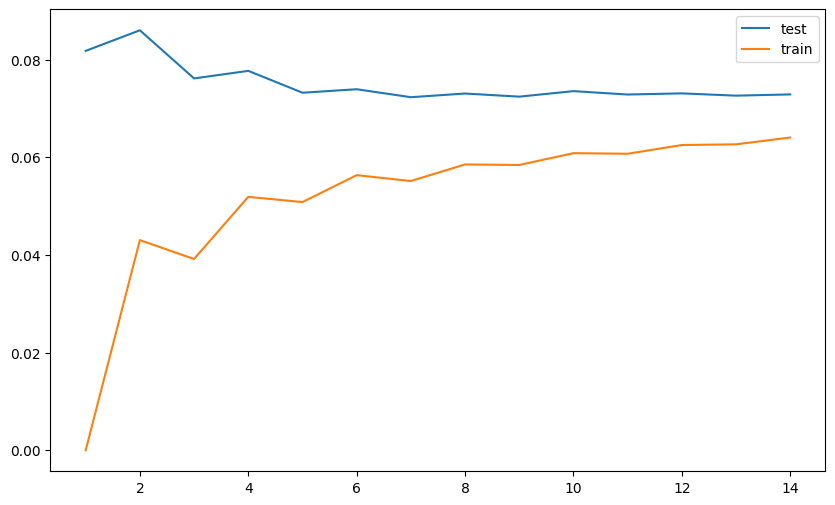

In [114]:
# Plot relationship between different values of K and the corresponding error values for a k-nearest neighbor classifier
# Helps visualize how the choice of K influences the test and train error rates in KNN model

# Initialize empty lists to store Kvalues and test error values
kltest = []
vltest = []

# Iterate through the items of the knn_many split dictionary (stores different K values and corresponding error values for both test and train sets)
for k, v in knn_many_split.items():
    kltest.append(k)
    vltest.append(knn_many_split[k][1])

# Initialize empty list to store K values and train error values
kltrain = []
vltrain = []

# Iterate through the same knn_many-split dictionary
for k, v in knn_many_split.items():
    kltrain.append(k)

    vltrain.append(knn_many_split[k][0])

# Plotting K values on x axis and test and train error values in the y-axis
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

The above plot shows that the test error is more or less similar for K greater than or equal to 4. The training error seems to remain the same with increasing K.
If we choose a higher value of K, the model would get biased due to imbalance in the dataset


In [115]:
# Define K-NN model
knn = KNeighborsClassifier(n_neighbors = 4)

In [116]:
# Fitting data to the K-NN model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     29950
           1       0.98      0.92      0.95     36115

    accuracy                           0.95     66065
   macro avg       0.95      0.95      0.95     66065
weighted avg       0.95      0.95      0.95     66065



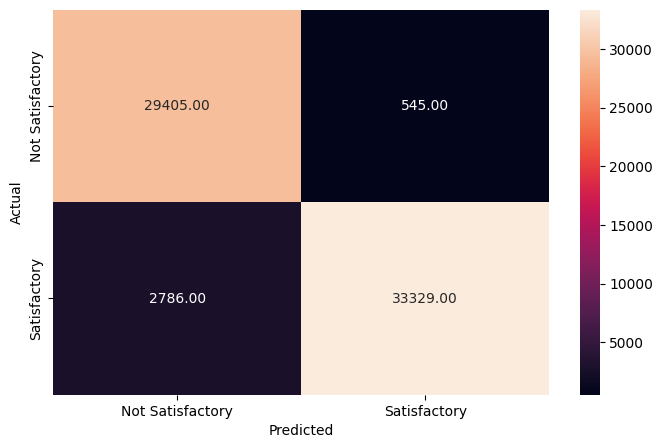

In [118]:
# Checking the performance of K-NN model on the training data
y_pred_train_knn = knn.predict(x_train)

metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     12836
           1       0.96      0.90      0.93     15478

    accuracy                           0.93     28314
   macro avg       0.92      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



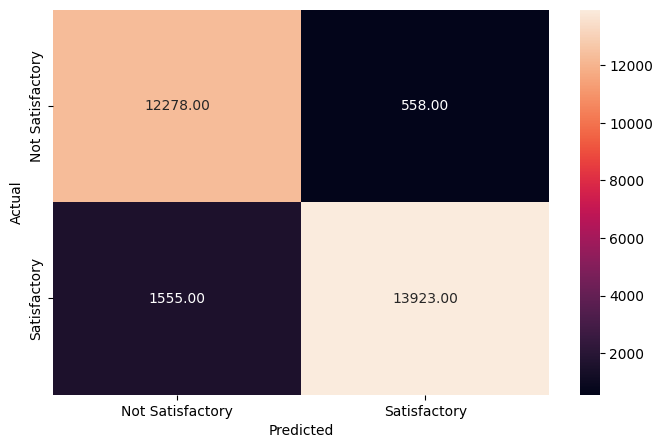

In [119]:
# Checking the performance of K-NN model on the testing data
y_pred_test_knn = knn.predict(x_test)

metrics_score(y_test, y_pred_test_knn)

**GridSearchCV for Hyperparameter tuning for KNN**

In [121]:
# Define parameter grid
params_knn = {'n_neighbors': np.arange(3, 8), 'weights': ['uniform'], 'p': [1]}

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='recall', cv=5, n_jobs=-1)

# Fit the model on a subset of the data
model_knn = grid_knn.fit(x_train, y_train)

knn_estimator = model_knn.best_estimator_
print(knn_estimator)

KNeighborsClassifier(n_neighbors=7, p=1)


In [122]:
# Fit the best estimator on the training data
knn_estimator.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     29950
           1       0.96      0.94      0.95     36115

    accuracy                           0.95     66065
   macro avg       0.95      0.95      0.95     66065
weighted avg       0.95      0.95      0.95     66065



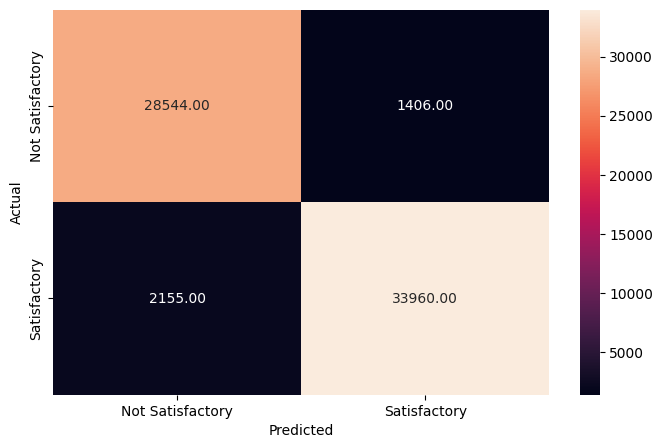

In [123]:
y_pred_train_knn_estimator = knn_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     12836
           1       0.94      0.93      0.93     15478

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



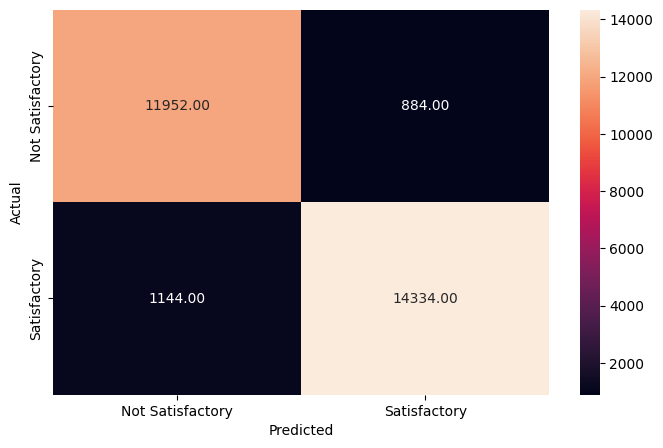

In [124]:
y_pred_test_knn_estimator = knn_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_knn_estimator)

**Feature Engineering**

In [125]:
def categorize_quality(row):
    excellence_levels = ['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor']
    count = row.value_counts()

    num_columns = len(row)  # Get the number of columns in the row

    # Calculate the threshold count based on the number of columns
    threshold_count = round(num_columns / 2)

    if count.get('Excellent', 0) >= threshold_count:
        return 'Excellent'
    elif count.get('Good', 0) >= threshold_count:
        return 'Good'
    elif count.get('Acceptable', 0) >= threshold_count:
        return 'Acceptable'
    elif count.get('Needs Improvement', 0) >= threshold_count:
        return 'Needs Improvement'
    elif count.get('Poor', 0) >= threshold_count:
        return 'Poor'
    elif count.get('Extremely Poor', 0) >= threshold_count:
        return 'Extremely Poor'
    else:
        return 'Needs Improvement'

In [126]:
# Apply the custom function along rows to create the new feature
train_data['Onboard Benefits Quality'] = train_data[['Onboard_Wifi_Service', 'Onboard_Entertainment', 'Onboard_Service','Catering']].apply(categorize_quality, axis=1)


In [127]:
columns_to_display = ['Onboard Benefits Quality','Onboard_Wifi_Service', 'Onboard_Entertainment', 'Onboard_Service','Catering']
selected_columns_df = train_data[columns_to_display]
selected_columns_df.head(10)

Onboard Benefits Quality Onboard_Wifi_Service Onboard_Entertainment  \
0        Needs Improvement                 Good     Needs Improvement   
1                     Poor                 Good                  Poor   
2        Needs Improvement    Needs Improvement                  Good   
3               Acceptable           Acceptable     Needs Improvement   
4                     Good    Needs Improvement                  Good   
5               Acceptable                 Good             Excellent   
6                     Good                 Good                  Good   
7                Excellent            Excellent             Excellent   
8               Acceptable           Acceptable     Needs Improvement   
9                     Good           Acceptable                  Good   

     Onboard_Service           Catering  
0  Needs Improvement          Excellent  
1          Excellent               Poor  
2          Excellent  Needs Improvement  
3         Acceptable         Acceptable  
4               Good         Acceptable  
5         Acceptable         Acceptable  
6               Good               Good  
7               Good         Acceptable  
8         Acceptable  Needs Improvement  
9  Needs Improvement               Good

In [128]:
train_data['Online Quality'] = train_data[['Online_Boarding', 'Online_Support', 'Ease_of_Online_Booking']].apply(categorize_quality, axis=1)


In [129]:
columns_to_display = ['Online Quality','Online_Boarding', 'Online_Support', 'Ease_of_Online_Booking']
selected_columns_df = train_data[columns_to_display]
selected_columns_df.head(10)

Online Quality Online_Boarding Online_Support Ease_of_Online_Booking
0  Needs Improvement            Poor     Acceptable      Needs Improvement
1               Good            Good           Good                   Good
2          Excellent       Excellent      Excellent              Excellent
3         Acceptable      Acceptable     Acceptable             Acceptable
4               Good            Good      Excellent                   Good
5         Acceptable      Acceptable           Good             Acceptable
6               Good            Good           Good                   Good
7               Good       Excellent           Good                   Good
8         Acceptable      Acceptable     Acceptable             Acceptable
9  Needs Improvement      Acceptable           Good      Needs Improvement

In [130]:
train_data['Seating Experience'] = train_data[['Seat_Comfort', 'Legroom','Cleanliness']].apply(categorize_quality, axis=1)


In [131]:
columns_to_display = ['Seating Experience','Seat_Comfort', 'Legroom','Cleanliness']
selected_columns_df = train_data[columns_to_display]
selected_columns_df.head(10)

Seating Experience       Seat_Comfort            Legroom        Cleanliness
0  Needs Improvement  Needs Improvement         Acceptable  Needs Improvement
1  Needs Improvement               Poor  Needs Improvement               Good
2          Excellent  Needs Improvement          Excellent          Excellent
3         Acceptable         Acceptable         Acceptable         Acceptable
4               Good         Acceptable               Good               Good
5  Needs Improvement  Needs Improvement               Good         Acceptable
6  Needs Improvement               Good          Excellent         Acceptable
7         Acceptable         Acceptable         Acceptable               Good
8  Needs Improvement  Needs Improvement         Acceptable  Needs Improvement
9  Needs Improvement  Needs Improvement  Needs Improvement  Needs Improvement

In [132]:
# Define age bucket boundaries
age_bins = [0, 12, 19, 35, 60, 100]

# Define age bucket labels
age_labels = ['Children', 'Teenagers', 'Young Adults', 'Adults', 'Seniors']

# Add a new column with age buckets
train_data['Age_Bucket'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels, right=False)


In [133]:
columns_to_display = ['Age_Bucket','Age']
selected_columns_df = train_data[columns_to_display]
selected_columns_df.head(10)

Age_Bucket   Age
0        Adults  52.0
1        Adults  48.0
2        Adults  43.0
3        Adults  44.0
4        Adults  50.0
5        Adults  44.0
6        Adults  56.0
7       Seniors  65.0
8  Young Adults  22.0
9        Adults  57.0

In [134]:
train_data['Delay Time'] = train_data['Arrival_Delay_in_Mins'] - train_data['Departure_Delay_in_Mins']

In [135]:
columns_to_display = ['Delay Time','Arrival_Delay_in_Mins','Departure_Delay_in_Mins']
selected_columns_df = train_data[columns_to_display]
selected_columns_df.head(10)

Delay Time  Arrival_Delay_in_Mins  Departure_Delay_in_Mins
0         5.0                    5.0                      0.0
1        -9.0                    0.0                      9.0
2        42.0                  119.0                     77.0
3         5.0                   18.0                     13.0
4         0.0                    0.0                      0.0
5         0.0                    0.0                      0.0
6         0.0                    0.0                      0.0
7         3.0                    3.0                      0.0
8        -1.0                    0.0                      1.0
9         0.0                    0.0                      0.0

In [136]:
train_data_fe = train_data.drop(columns = ['Onboard_Wifi_Service', 'Onboard_Entertainment', 'Onboard_Service','Catering','Online_Boarding', 'Online_Support', 'Ease_of_Online_Booking', 'Seat_Comfort', 'Legroom','Cleanliness','Age', 'Arrival_Delay_in_Mins','Departure_Delay_in_Mins'])

In [137]:
train_data_fe.head()

ID  Gender   Customer_Type      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  Business Travel     Business   
1  98800002    Male  Loyal Customer  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  Business Travel     Business   
3  98800004  Female  Loyal Customer  Business Travel     Business   
4  98800005  Female  Loyal Customer  Business Travel     Business   

   Travel_Distance Overall_Experience Seat_Class Arrival_Time_Convenient  \
0              272                  0  Green Car               Excellent   
1             2200                  0   Ordinary               Excellent   
2             1061                  1  Green Car       Needs Improvement   
3              780                  0   Ordinary       Needs Improvement   
4             1981                  1   Ordinary              Acceptable   

   Platform_Location   Baggage_Handling    CheckIn_Service  \
0    Very Convenient  Needs Improvement               Good   
1  Needs Improvement               Poor  Needs Improvement   
2  Needs Improvement          Excellent               Good   
3  Needs Improvement         Acceptable               Good   
4         Manageable               Good               Good   

  Onboard Benefits Quality     Online Quality Seating Experience Age_Bucket  \
0        Needs Improvement  Needs Improvement  Needs Improvement     Adults   
1                     Poor               Good  Needs Improvement     Adults   
2        Needs Improvement          Excellent          Excellent     Adults   
3               Acceptable         Acceptable         Acceptable     Adults   
4                     Good               Good               Good     Adults   

   Delay Time  
0         5.0  
1        -9.0  
2        42.0  
3         5.0  
4         0.0

In [138]:
train_data_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        94379 non-null  int64   
 1   Gender                    94379 non-null  object  
 2   Customer_Type             94379 non-null  object  
 3   Type_Travel               94379 non-null  object  
 4   Travel_Class              94379 non-null  object  
 5   Travel_Distance           94379 non-null  int64   
 6   Overall_Experience        94379 non-null  category
 7   Seat_Class                94379 non-null  object  
 8   Arrival_Time_Convenient   94379 non-null  object  
 9   Platform_Location         94379 non-null  object  
 10  Baggage_Handling          94379 non-null  object  
 11  CheckIn_Service           94379 non-null  object  
 12  Onboard Benefits Quality  94379 non-null  object  
 13  Online Quality            94379 non-null  obje

In [139]:
# Ensure Age_Bucket is treated as an object column instead of numerical
train_data_fe['Age_Bucket'] = train_data_fe['Age_Bucket'].astype('object')

In [140]:
train_data_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        94379 non-null  int64   
 1   Gender                    94379 non-null  object  
 2   Customer_Type             94379 non-null  object  
 3   Type_Travel               94379 non-null  object  
 4   Travel_Class              94379 non-null  object  
 5   Travel_Distance           94379 non-null  int64   
 6   Overall_Experience        94379 non-null  category
 7   Seat_Class                94379 non-null  object  
 8   Arrival_Time_Convenient   94379 non-null  object  
 9   Platform_Location         94379 non-null  object  
 10  Baggage_Handling          94379 non-null  object  
 11  CheckIn_Service           94379 non-null  object  
 12  Onboard Benefits Quality  94379 non-null  object  
 13  Online Quality            94379 non-null  obje

**Preparing data for modeling using Feature Engineering**

In [141]:
# Calculate missing ratio for each column
missing_ratio_test = round(train_data_fe.isnull().sum() / len(train_data_fe) * 100,2)

print("Missing Ratio by Column:")
print(missing_ratio_test)

Missing Ratio by Column:
ID                          0.0
Gender                      0.0
Customer_Type               0.0
Type_Travel                 0.0
Travel_Class                0.0
Travel_Distance             0.0
Overall_Experience          0.0
Seat_Class                  0.0
Arrival_Time_Convenient     0.0
Platform_Location           0.0
Baggage_Handling            0.0
CheckIn_Service             0.0
Onboard Benefits Quality    0.0
Online Quality              0.0
Seating Experience          0.0
Age_Bucket                  0.0
Delay Time                  0.0
dtype: float64


In [142]:
# Get a list of categorical variables
categorical_columns_fe = train_data_fe.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
for c in categorical_columns_fe:
  print(c)

Categorical Columns:
Gender
Customer_Type
Type_Travel
Travel_Class
Seat_Class
Arrival_Time_Convenient
Platform_Location
Baggage_Handling
CheckIn_Service
Onboard Benefits Quality
Online Quality
Seating Experience
Age_Bucket


In [143]:
# Creating dummy variables
df_fe = pd.get_dummies(data = train_data_fe, columns = categorical_columns_fe, drop_first = True)

In [144]:
# Separating the target variable and other variables
Y_fe = df_fe.Overall_Experience
X_fe = df_fe.drop(columns = ['Overall_Experience'])

In [145]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
sc = StandardScaler()

X_scaled_fe = sc.fit_transform(X_fe)

X_scaled_fe = pd.DataFrame(X_scaled_fe, columns = X_fe.columns)

In [146]:
# Splitting the data
x_train_fe, x_test_fe, y_train_fe, y_test_fe = train_test_split(X_scaled_fe, Y_fe, test_size = 0.3, random_state = 1, stratify = Y_fe)

**Logistic Regression Model Building using Feature Engineering**

In [147]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(x_train_fe,y_train_fe)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     29950
           1       0.85      0.85      0.85     36115

    accuracy                           0.84     66065
   macro avg       0.84      0.84      0.84     66065
weighted avg       0.84      0.84      0.84     66065



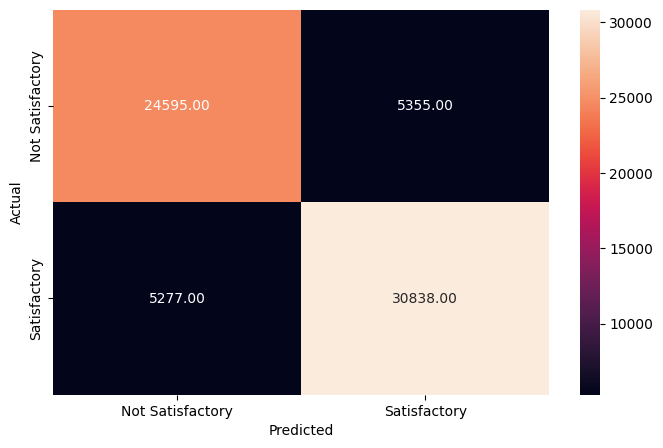

In [148]:
# Checking the performance on the training data
y_pred_train_fe = lg.predict(x_train_fe)

metrics_score(y_train_fe, y_pred_train_fe)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     12836
           1       0.85      0.86      0.85     15478

    accuracy                           0.84     28314
   macro avg       0.84      0.84      0.84     28314
weighted avg       0.84      0.84      0.84     28314



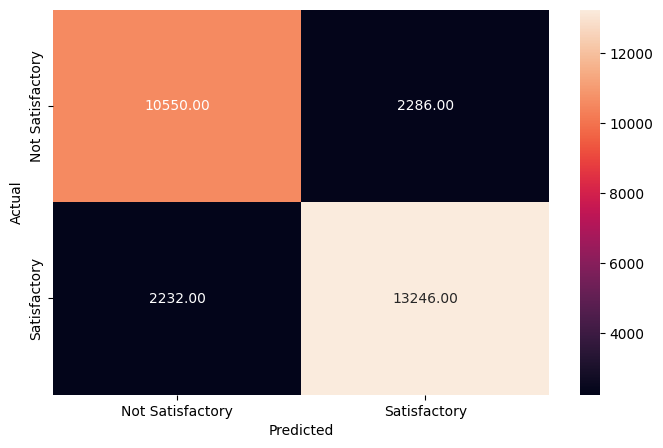

In [149]:
# Checking the performance on the test dataset
y_pred_test_fe = lg.predict(x_test_fe)
metrics_score(y_test_fe, y_pred_test_fe)

In [150]:
# Let's check the coefficients and find which variables are leading to satisfaction and which can reduce satisfcation
# Printing the coefficients of logistic regression
cols = X_fe.columns

coef_lg_fe = lg.coef_

coef_df_fe = pd.DataFrame(coef_lg_fe,columns = cols).T.sort_values(by = 0, ascending = False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(coef_df_fe)

                                                   0
Onboard Benefits Quality_Excellent          1.249263
Seating Experience_Excellent                0.976939
Customer_Type_Loyal Customer                0.791340
Onboard Benefits Quality_Good               0.629307
Seating Experience_Good                     0.580829
Seating Experience_Extremely Poor           0.490969
Online Quality_Good                         0.342228
Onboard Benefits Quality_Extremely Poor     0.313011
CheckIn_Service_Excellent                   0.297975
Online Quality_Excellent                    0.225454
Seating Experience_Needs Improvement        0.224228
Baggage_Handling_Excellent                  0.217087
Onboard Benefits Quality_Needs Improvement  0.145020
Baggage_Handling_Good                       0.134157
Platform_Location_Very Convenient           0.131796
Platform_Location_Needs Improvement         0.127663
Arrival_Time_Convenient_Extremely Poor      0.119635
Online Quality_Needs Improvement            0.

In [151]:
# convert the log of odds into odds by taking its exponential.
odds_fe = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
odds_df_fe = pd.DataFrame(odds_fe, x_train_fe.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(odds_df_fe)

                                                odds
Onboard Benefits Quality_Excellent          3.487772
Seating Experience_Excellent                2.656313
Customer_Type_Loyal Customer                2.206350
Onboard Benefits Quality_Good               1.876310
Seating Experience_Good                     1.787519
Seating Experience_Extremely Poor           1.633898
Online Quality_Good                         1.408081
Onboard Benefits Quality_Extremely Poor     1.367537
CheckIn_Service_Excellent                   1.347128
Online Quality_Excellent                    1.252891
Seating Experience_Needs Improvement        1.251356
Baggage_Handling_Excellent                  1.242452
Onboard Benefits Quality_Needs Improvement  1.156062
Baggage_Handling_Good                       1.143572
Platform_Location_Very Convenient           1.140875
Platform_Location_Needs Improvement         1.136170
Arrival_Time_Convenient_Extremely Poor      1.127086
Online Quality_Needs Improvement            1.

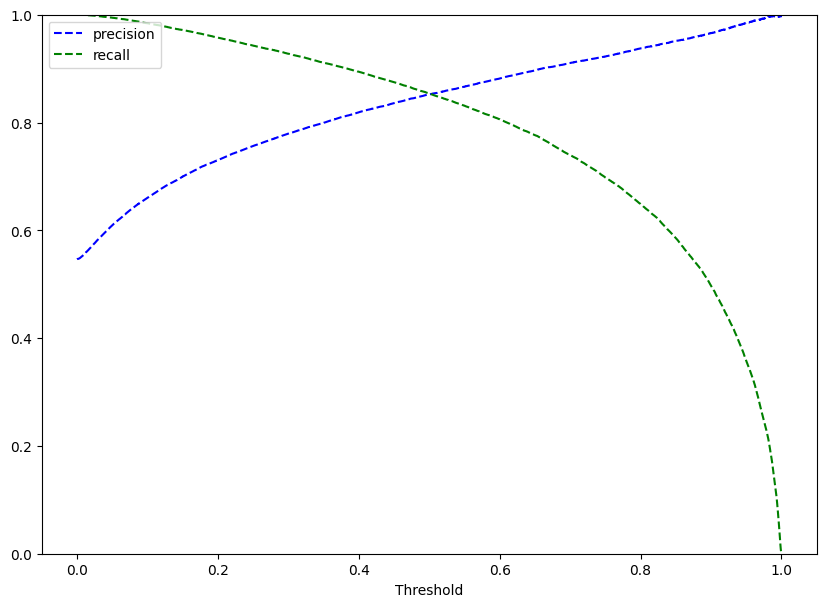

In [152]:
y_scores_lg_fe = lg.predict_proba(x_train_fe) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train_fe, y_scores_lg_fe[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     29950
           1       0.85      0.85      0.85     36115

    accuracy                           0.84     66065
   macro avg       0.84      0.84      0.84     66065
weighted avg       0.84      0.84      0.84     66065



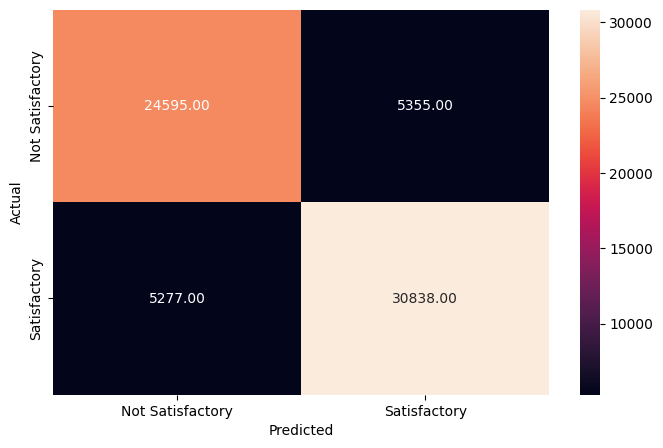

In [153]:
# Performance of model at threshold of 0.5
optimal_threshold1 = .5

y_pred_train_fe = lg.predict_proba(x_train_fe)

metrics_score(y_train_fe, y_pred_train_fe[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     12836
           1       0.85      0.86      0.85     15478

    accuracy                           0.84     28314
   macro avg       0.84      0.84      0.84     28314
weighted avg       0.84      0.84      0.84     28314



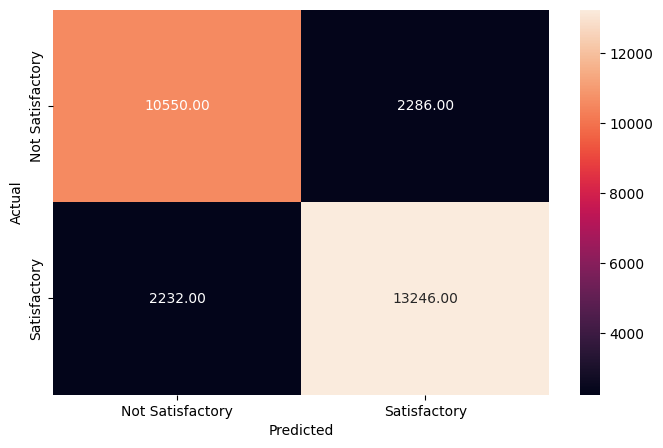

In [154]:
optimal_threshold1 = .5

y_pred_test_fe = lg.predict_proba(x_test_fe)

metrics_score(y_test_fe, y_pred_test_fe[:, 1] > optimal_threshold1)

**Support Vector Machine Model Building using Feature Engineering**

In [155]:
from sklearn.svm import SVC
model_svm_fe = SVC() # Default parameters
model_svm_fe.fit(x_train_fe,y_train_fe)

SVC()

In [156]:
predictions_fe = model_svm_fe.predict(x_test_fe)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     29950
           1       0.92      0.91      0.92     36115

    accuracy                           0.91     66065
   macro avg       0.91      0.91      0.91     66065
weighted avg       0.91      0.91      0.91     66065



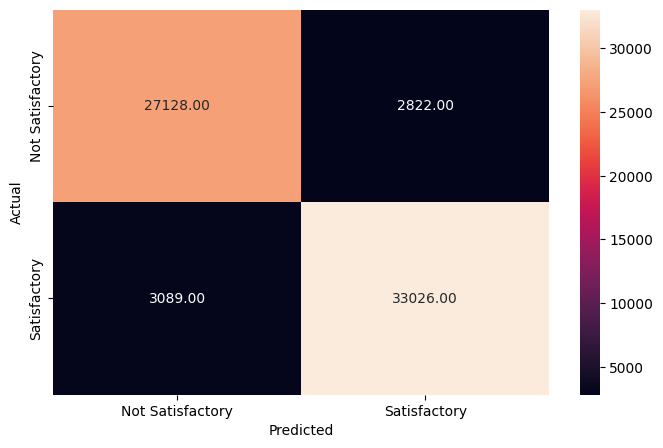

In [157]:
# Checking the performance on the training data
y_pred_train_fe = model_svm_fe.predict(x_train_fe)
metrics_score(y_train_fe, y_pred_train_fe)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12836
           1       0.90      0.90      0.90     15478

    accuracy                           0.89     28314
   macro avg       0.89      0.89      0.89     28314
weighted avg       0.89      0.89      0.89     28314



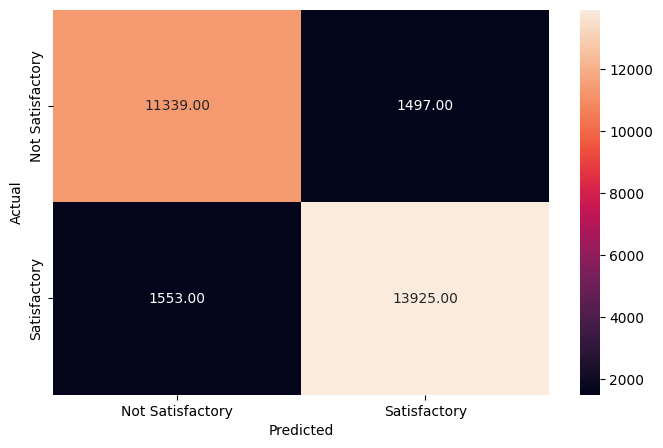

In [158]:
# Checking the performance on the test dataset
y_pred_test_fe = model_svm_fe.predict(x_test_fe)
metrics_score(y_test_fe, y_pred_test_fe)

**KNN Model Model Building using Feature Engineering**

In [160]:
# Create instance of KNeighborsClassifier class
knn = KNeighborsClassifier()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K
train_error = []
test_error = []

# Initialize an empty dictionary knn_many_split to store error rates for different values of 'k'
knn_many_split_fe = {}

error_df_knn = pd.DataFrame()

features = X_fe.columns

# Iterate over range from 1 to 14
for k in range(1, 15):
    # Initialize empty lists to store error values for current k
    train_error = []
    test_error = []
    lista = []

    knn = KNeighborsClassifier(n_neighbors = k)

    for i in range(15):
        # Split training data into training and validation sets
        x_train_new, x_val, y_train_new, y_val = train_test_split(x_train_fe, y_train_fe, test_size = 0.20)

        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)

        # Append calculated error on the train_error and test_error lists
        train_error.append(1 - knn.score(x_train_new, y_train_new))

        # Append calculated errors on the train_error and test_error lists
        test_error.append(1 - knn.score(x_val, y_val))

    # Calculate mean of the train error and test error
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))

    knn_many_split_fe[k] = lista

# Contains mean train and test error rates for different values of k
knn_many_split_fe

{1: [0.0, 0.166432049244431],
 2: [0.08210726809455333, 0.1646459295138626],
 3: [0.08069451802517721, 0.14620449557254217],
 4: [0.09805999142258885, 0.14462524281641817],
 5: [0.09639244178712886, 0.1397966649007291],
 6: [0.10461540402129217, 0.13896919700295166],
 7: [0.10476424733217286, 0.13521027271121877],
 8: [0.10882968793360073, 0.13685007189888748],
 9: [0.108719947526426, 0.13260173061883498],
 10: [0.11165266530437196, 0.1334392895885365],
 11: [0.11149751507353868, 0.13164307878604403],
 12: [0.11361285602563133, 0.1328489618809758],
 13: [0.113673402457176, 0.1320164484472363],
 14: [0.11517697217386914, 0.1331971038623578]}

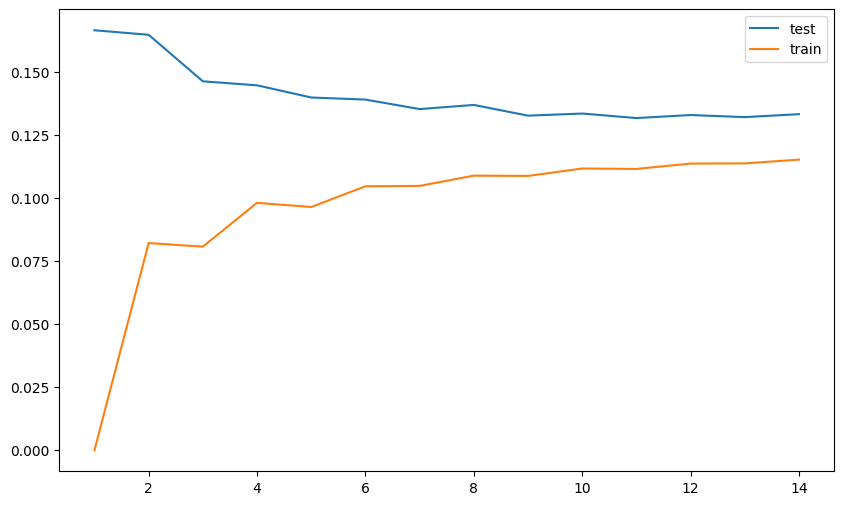

In [161]:
# Plot relationship between different values of K and the corresponding error values for a k-nearest neighbor classifier
# Helps visualize how the choice of K influences the test and train error rates in KNN model

# Initialize empty lists to store Kvalues and test error values
kltest = []
vltest = []

# Iterate through the items of the knn_many split dictionary (stores different K values and corresponding error values for both test and train sets)
for k, v in knn_many_split_fe.items():
    kltest.append(k)
    vltest.append(knn_many_split_fe[k][1])

# Initialize empty list to store K values and train error values
kltrain = []
vltrain = []

# Iterate through the same knn_many-split dictionary
for k, v in knn_many_split_fe.items():
    kltrain.append(k)

    vltrain.append(knn_many_split_fe[k][0])

# Plotting K values on x axis and test and train error values in the y-axis
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

The above plot shows that the optimal K is 4. If a higher K value was chosen, the model would get biased due to the imbalance in the dataset

In [162]:
# Define K-NN model
knn_fe = KNeighborsClassifier(n_neighbors = 4)

In [163]:
# Fitting data to the K-NN model
knn_fe.fit(x_train_fe,y_train_fe)

KNeighborsClassifier(n_neighbors=4)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     29950
           1       0.95      0.86      0.91     36115

    accuracy                           0.90     66065
   macro avg       0.90      0.91      0.90     66065
weighted avg       0.91      0.90      0.90     66065



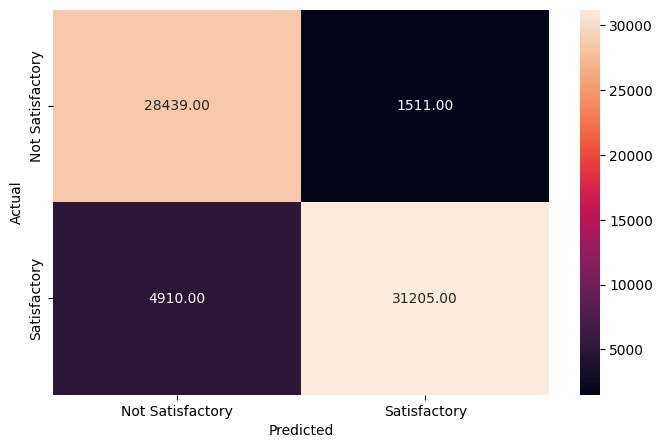

In [164]:
# Checking the performance of K-NN model on the training data
y_pred_train_knn_fe = knn_fe.predict(x_train_fe)

metrics_score(y_train_fe, y_pred_train_knn_fe)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     12836
           1       0.89      0.86      0.87     15478

    accuracy                           0.86     28314
   macro avg       0.86      0.87      0.86     28314
weighted avg       0.87      0.86      0.86     28314



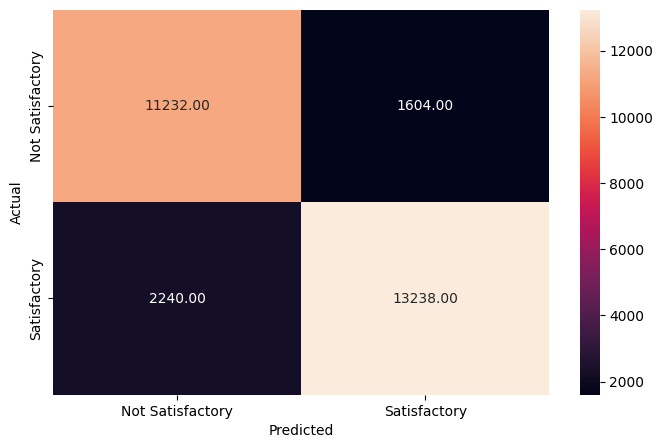

In [166]:
# Checking the performance of K-NN model on the testing data
y_pred_test_knn_fe = knn.predict(x_test_fe)

metrics_score(y_test_fe, y_pred_test_knn_fe)

In [168]:
# Define parameter grid
params_knn = {'n_neighbors': np.arange(3, 8), 'weights': ['uniform'], 'p': [1]}

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='recall', cv=5, n_jobs=-1)

# Fit the model on a subset of the data
model_knn = grid_knn.fit(x_train, y_train)

knn_estimator_fe = model_knn.best_estimator_
print(knn_estimator)

KNeighborsClassifier(n_neighbors=7, p=1)


In [169]:
# Fit the best estimator on the training data
knn_estimator_fe.fit(x_train_fe, y_train_fe)

KNeighborsClassifier(n_neighbors=7, p=1)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     29950
           1       0.91      0.91      0.91     36115

    accuracy                           0.90     66065
   macro avg       0.90      0.90      0.90     66065
weighted avg       0.90      0.90      0.90     66065



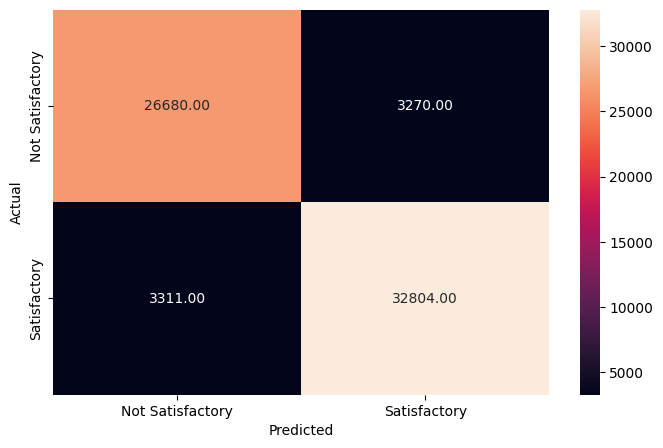

In [170]:
y_pred_train_knn_estimator_fe = knn_estimator_fe.predict(x_train_fe)

metrics_score(y_train_fe, y_pred_train_knn_estimator_fe)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12836
           1       0.88      0.88      0.88     15478

    accuracy                           0.87     28314
   macro avg       0.87      0.87      0.87     28314
weighted avg       0.87      0.87      0.87     28314



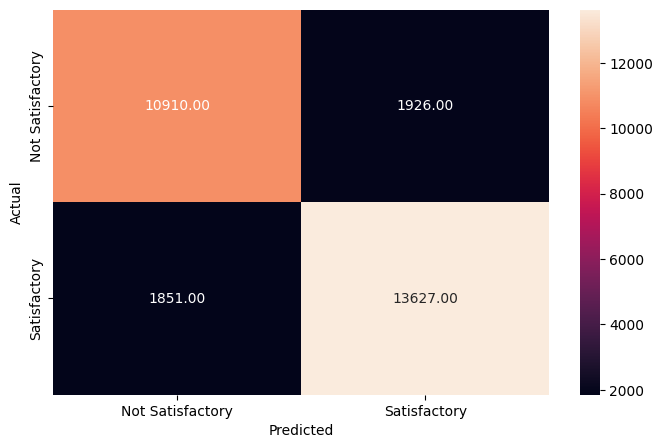

In [171]:
y_pred_test_knn_estimator_fe = knn_estimator_fe.predict(x_test_fe)

metrics_score(y_test_fe, y_pred_test_knn_estimator_fe)

**Feature Importance**

SHAP value helps us quantify feature's contribution towards a prediction. SHAP value closer to zero means the feature contributes little to the prediction whereas SHAP value away from zero indicates the feature contributes more. So, large positive/negative SHAP values are found in features that significantly affect the model's predictions.

In [97]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.9 MB/s eta 0:00:00


In [98]:
import shap
import numpy as np
import random

In [99]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28314 entries, 81488 to 42255
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         28314 non-null  float64
 1   Age                                        28314 non-null  float64
 2   Travel_Distance                            28314 non-null  float64
 3   Departure_Delay_in_Mins                    28314 non-null  float64
 4   Arrival_Delay_in_Mins                      28314 non-null  float64
 5   Gender_Male                                28314 non-null  float64
 6   Customer_Type_Loyal Customer               28314 non-null  float64
 7   Type_Travel_Personal Travel                28314 non-null  float64
 8   Travel_Class_Eco                           28314 non-null  float64
 9   Seat_Comfort_Excellent                     28314 non-null  float64
 10  Seat_Comfort_Extre

In [100]:
# Subsampiling is used due to limited computational resources
# It's important to note that subsampling might not capture the full complexity of the dataset

# Reset index
x_test.reset_index(drop=True, inplace=True)

# Subsample a smaller portion of your test dataset (e.g., 1000 records)
subsample_size = 100
x_subsample = x_test.sample(n=subsample_size, random_state=42)

# Fitting the Explainer
explainer = shap.Explainer(model_svm.predict, masker=shap.maskers.Independent(x_subsample))

# Calculating the SHAP values for the subsampled test data
shap_values = explainer(x_subsample)

Permutation explainer: 101it [1:02:44, 37.64s/it]


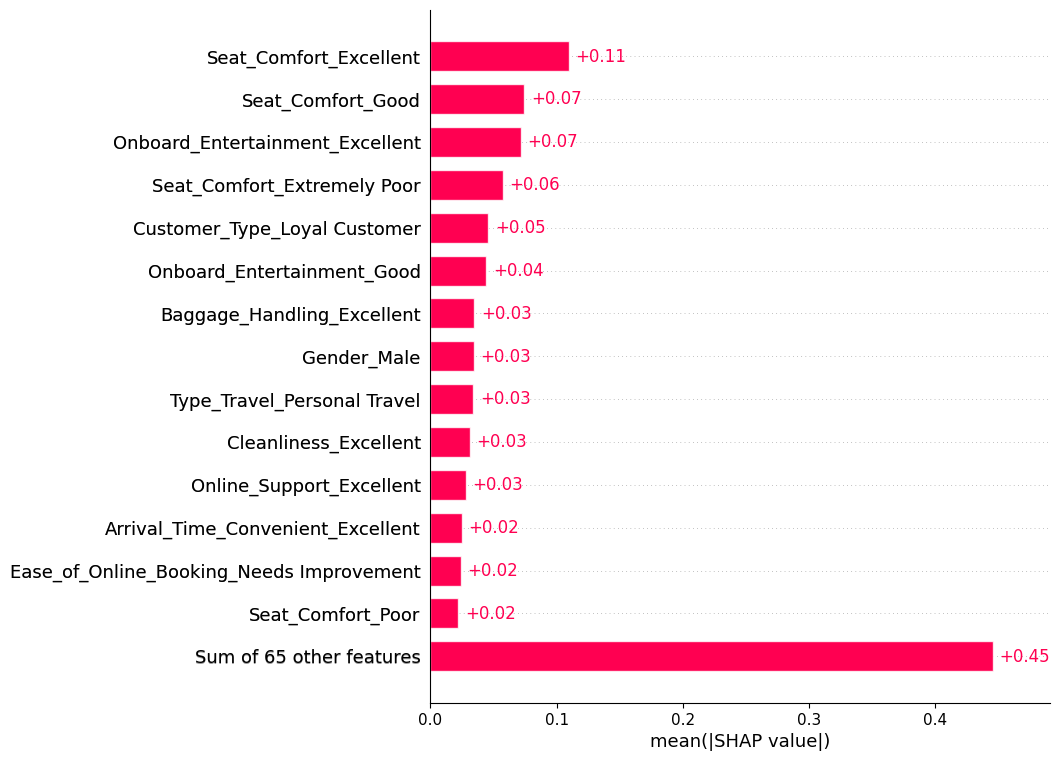

In [102]:
shap.plots.bar(shap_values,max_display=15)

The above barplot from SHAP shows that Seat Comfort Excellent is the most important feature for the SVM model to predict passengers' satisfaction because we can observe Seat Comfot had the highest mean SHAP of all features.

Seat Comfort Good and Online Entertainment Excellent are two features that equally contribute for passengers' satisfaction.

The sum of the mean SHAP value for the rest of the 65 features is 0.45, which means that there are some features with mean value less than 0.02.

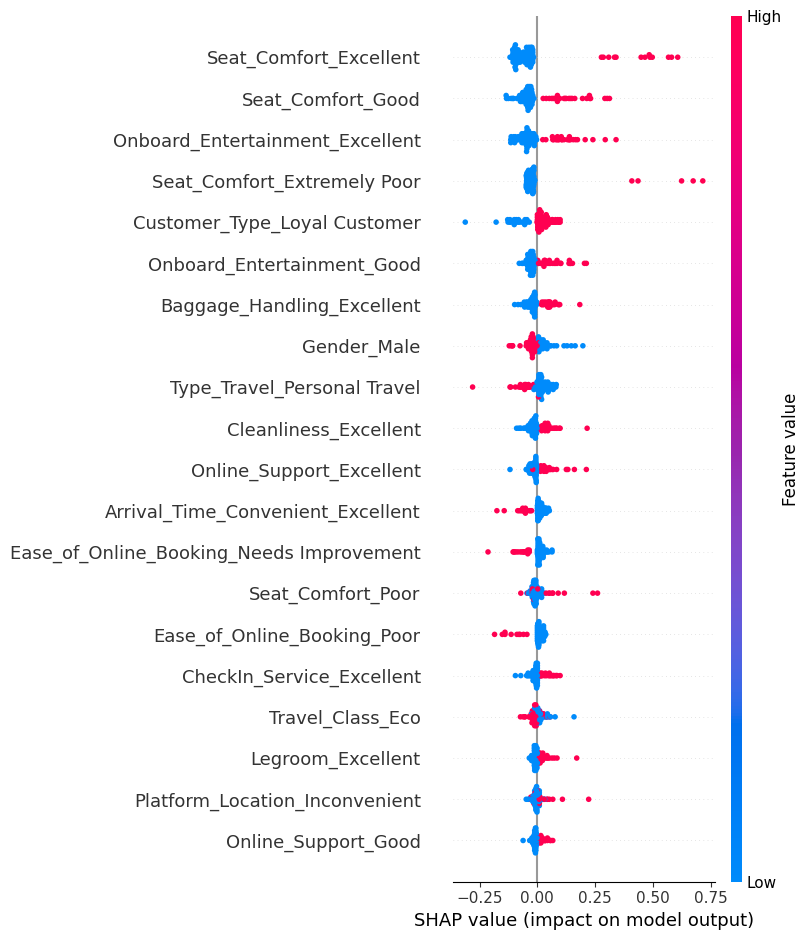

In [103]:
shap.summary_plot(shap_values)

The summary plot shows that Seat Comfort Excellent, Seat Comfort Good, and Online Entertainment Excellent are the three most important features to predict whether a passenger would have a satisfactory experience or not.

**Test Chosen Model on Test Data**

In [104]:
# Get the list of columns that exist in train_data but not in test_data
columns_only_in_df = df.columns.difference(df_test.columns).tolist()
columns_only_in_df

['CheckIn_Service_Extremely Poor',
 'Cleanliness_Extremely Poor',
 'Onboard_Service_Extremely Poor',
 'Online_Support_Extremely Poor',
 'Overall_Experience',
 'Platform_Location_Very Inconvenient']

In [105]:
cols_diff = ['CheckIn_Service_Extremely Poor','Online_Support_Extremely Poor','Cleanliness_Extremely Poor','Onboard_Service_Extremely Poor','Online_Support_Extremely Poor','Platform_Location_Very Inconvenient']

In [106]:
for col in cols_diff:
  df_test[col] =0
  df_test[col] = df_test[col].astype('uint8')

In [107]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
sc = StandardScaler()

X_scaled_test = sc.fit_transform(df_test)

X_scaled_test = pd.DataFrame(X_scaled_test, columns = df_test.columns)

In [108]:
# Initialize an empty dictionary to store category counts
category_counts = {}

# Loop through each column in the DataFrame
for column in train_data.columns:
    if train_data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(train_data[column]):
        # Count unique categories and store in the dictionary
        category_counts[column] = train_data[column].nunique()

# Print the category counts
for column, count in category_counts.items():
    print(f"{count} - {column}")

2 - Gender
2 - Customer_Type
2 - Type_Travel
2 - Travel_Class
2 - Overall_Experience
6 - Seat_Comfort
2 - Seat_Class
6 - Arrival_Time_Convenient
6 - Catering
6 - Platform_Location
6 - Onboard_Wifi_Service
6 - Onboard_Entertainment
6 - Online_Support
6 - Ease_of_Online_Booking
6 - Onboard_Service
6 - Legroom
5 - Baggage_Handling
6 - CheckIn_Service
6 - Cleanliness
6 - Online_Boarding


In [109]:
# Initialize an empty dictionary to store category counts
category_counts = {}

# Loop through each column in the DataFrame
for column in test_data.columns:
    if test_data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(test_data[column]):
        # Count unique categories and store in the dictionary
        category_counts[column] = test_data[column].nunique()

# Print the category counts
for column, count in category_counts.items():
    print(f"{count} - {column}")

2 - Gender
2 - Customer_Type
2 - Type_Travel
2 - Travel_Class
6 - Seat_Comfort
2 - Seat_Class
6 - Arrival_Time_Convenient
6 - Catering
5 - Platform_Location
6 - Onboard_Wifi_Service
6 - Onboard_Entertainment
5 - Online_Support
6 - Ease_of_Online_Booking
5 - Onboard_Service
6 - Legroom
5 - Baggage_Handling
5 - CheckIn_Service
5 - Cleanliness
6 - Online_Boarding


In [110]:
cols = list(X_scaled.columns)
cols

['ID',
 'Age',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Gender_Male',
 'Customer_Type_Loyal Customer',
 'Type_Travel_Personal Travel',
 'Travel_Class_Eco',
 'Seat_Comfort_Excellent',
 'Seat_Comfort_Extremely Poor',
 'Seat_Comfort_Good',
 'Seat_Comfort_Needs Improvement',
 'Seat_Comfort_Poor',
 'Seat_Class_Ordinary',
 'Arrival_Time_Convenient_Excellent',
 'Arrival_Time_Convenient_Extremely Poor',
 'Arrival_Time_Convenient_Good',
 'Arrival_Time_Convenient_Needs Improvement',
 'Arrival_Time_Convenient_Poor',
 'Catering_Excellent',
 'Catering_Extremely Poor',
 'Catering_Good',
 'Catering_Needs Improvement',
 'Catering_Poor',
 'Platform_Location_Inconvenient',
 'Platform_Location_Manageable',
 'Platform_Location_Needs Improvement',
 'Platform_Location_Very Convenient',
 'Platform_Location_Very Inconvenient',
 'Onboard_Wifi_Service_Excellent',
 'Onboard_Wifi_Service_Extremely Poor',
 'Onboard_Wifi_Service_Good',
 'Onboard_Wifi_Service_Needs Improvement',
 '

In [111]:
# Calculate missing ratio for each column
missing_ratio_test = round(X_scaled_test.isnull().sum() / len(X_scaled_test) * 100,2)

print("Missing Ratio by Column:")
print(missing_ratio_test)

Missing Ratio by Column:
ID                                     0.00
Age                                    0.00
Travel_Distance                        0.00
Departure_Delay_in_Mins                0.08
Arrival_Delay_in_Mins                  0.00
                                       ... 
CheckIn_Service_Extremely Poor         0.00
Online_Support_Extremely Poor          0.00
Cleanliness_Extremely Poor             0.00
Onboard_Service_Extremely Poor         0.00
Platform_Location_Very Inconvenient    0.00
Length: 79, dtype: float64


<Axes: >

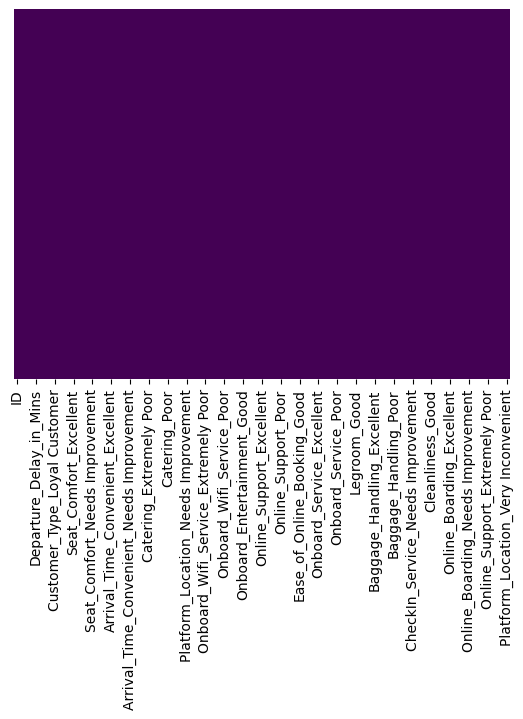

In [112]:
# Visualize if there are any missing values in the data
sns.heatmap(X_scaled_test.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [114]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_scaled_test_imputed = imputer.fit_transform(X_scaled_test)
y_pred_test = model_svm.predict(X_scaled_test_imputed)

In [115]:
# Store the predicted values in an array
svm_predicted_values = y_pred_test

In [116]:
test_ids = test_data['ID']

In [117]:
submission_df =  pd.DataFrame({'ID': test_ids, 'Overall_Experience': svm_predicted_values})

In [118]:
submission_df.to_csv('submission.csv', index=False)
print("Submission CSV file created successfully.")

Submission CSV file created successfully.


**Conclusions:**



The performance of the logistic regression model was very similar on the train and test data sets. Fine-tunning the logistic regression model did not improve the performance of the model.

The performance of the SVM model was slightly superior on the training data set than on the testing data set.

The performance of the KNN model was slighly greater on the training data set than the testing data set. Fine-tunning the parameters of the KNN model did not significantly impact the performance of the model.

The performance of the logistic regression model using engineered features had a relatively similar performance on the training and testing data sets. Fine-tunning the parameters of the logistic regression model that uses engineered features did not had a great impact on the performance of the model.

The performance of the SVM model using engineered features was slightly better on the training data set than on the testing data set.

The performance of the KNN model that uses engineered features was slightly greater on the training data set than on the testing data set. Fine-tunning the parameters for the KNN model that uses engineered features had a slight positive impact on the performance of the model.

I notice that the usage of engineered features did not positively impact the performance of the models. The best performing model is SVM. Given greater computation resources, hyperparameter tunning would probably increase the accuracy score of 95%.

To ensure passengers have a satisfactory experience, we want to prioritize precission over recall because we want to avoid false positive predictions, which are instances when the model predicts passengers had a satisfactory experience, but passengers actually had a negative experience. The SVM model has a higher precision, 96%, than recall, 95%.

The three most important features to predict whether a passenger would have a satisfactory experience or not are Seat Comfort Excellent, Seat Comfort Good, and Online Entertainment Excellent.

